In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DataTransformation import LowPassFilter, PrincipalComponentAnalysis
from TemporalAbstraction import NumericalAbstraction

In [2]:
df = pd.read_pickle("../../data/interim/02_outlier_removed_chauvenet.pkl")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acce_x       9005 non-null   float64
 1   acce_y       8998 non-null   float64
 2   acce_z       8999 non-null   float64
 3   gyro_x       8984 non-null   float64
 4   gyro_y       8938 non-null   float64
 5   gyro_z       8945 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int32  
dtypes: float64(6), int32(1), object(3)
memory usage: 739.0+ KB


In [4]:
df

acce_x    acce_y    acce_z  gyro_x  gyro_y  gyro_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                        participant  label category  set  
epoch (ms)                                                
2019-01-11 15:08:05.200           B  bench    heavy   30  
2019-01-11 15:08:05.400           B  bench    heavy   30  
2019-01-11 15:08:05.600           B  bench    heavy   30  
2019-01-11 15:08:05.800           B  bench    heavy   30  
2019-01-11 15:08:06.000           B  bench    heavy   30  
...                             ...    ...      ...  ...  
2019-01-20 17:33:27.000           E    row   medium   90  
2019-01-20 17:33:27.200           E    row   medium   90  
2019-01-20 17:33:27.400           E    row   medium   90  
2019-01-20 17:33:27.600           E    row   medium   90  
2019-01-20 17:33:27.800           E    row   medium   90  

[9009 rows x 10 columns]

In [5]:
df.columns[:6]

Index(['acce_x', 'acce_y', 'acce_z', 'gyro_x', 'gyro_y', 'gyro_z'], dtype='object')

In [6]:
list(df.columns[:6])

['acce_x', 'acce_y', 'acce_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [7]:
predictor_columns = list(df.columns[:6])

In [8]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

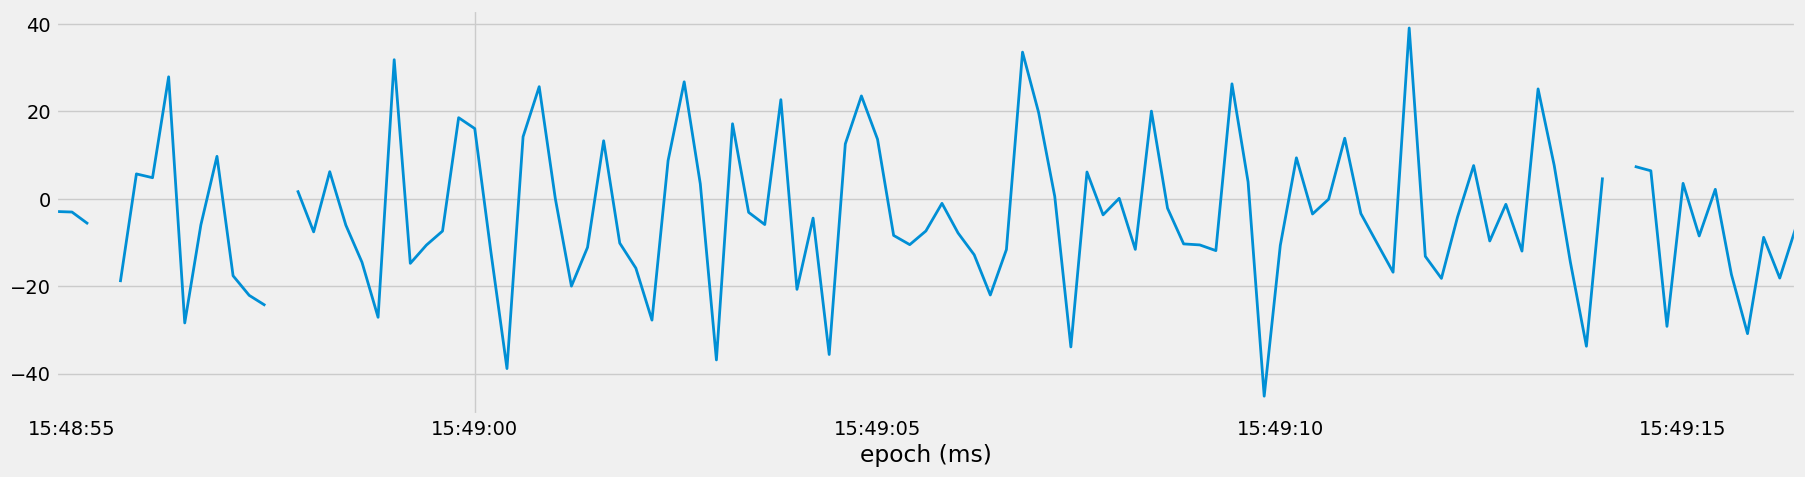

In [11]:
subset = df[df["set"] == 35]["gyro_y"].plot()

In [12]:
# Those gaps in the graph are the NaN data. What we are to do is to interpolate data so that there will be no gaps.

In [13]:
for per_col in predictor_columns:
    df[per_col] = df[per_col].interpolate()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acce_x       9009 non-null   float64
 1   acce_y       9009 non-null   float64
 2   acce_z       9009 non-null   float64
 3   gyro_x       9009 non-null   float64
 4   gyro_y       9009 non-null   float64
 5   gyro_z       9009 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int32  
dtypes: float64(6), int32(1), object(3)
memory usage: 739.0+ KB


In [15]:
# Now we can see that there are no missing values anymore. Next we do the graph again and see what the pandas' interpolate method does to our data.

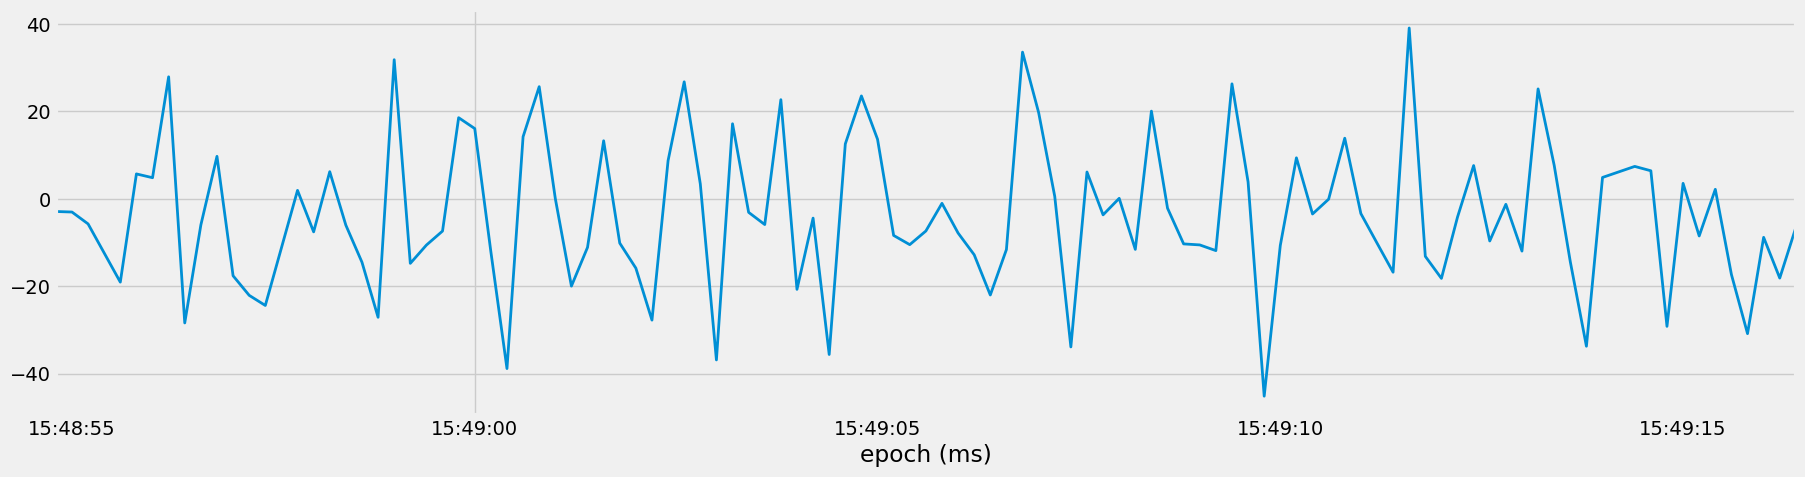

In [16]:
subset = df[df["set"] == 35]["gyro_y"].plot()

In [17]:
# Interpolate method fils the gaps nicely. 

In [18]:
# Just a note for the Butterworth lowpass filter, it removes noise to the data. Example:

In [25]:
df[df["set"] == 25]

acce_x    acce_y    acce_z   gyro_x  gyro_y  \
epoch (ms)                                                               
2019-01-15 19:09:07.200  0.169000  0.645000  0.662000   5.9390 -4.6950   
2019-01-15 19:09:07.400  0.163000  0.631000  0.658000  -1.5976 -2.9636   
2019-01-15 19:09:07.600  0.153667  0.571333  0.607000  -6.1706 -3.9636   
2019-01-15 19:09:07.800  0.180500  0.620500  0.675500  -3.8414 -3.1586   
2019-01-15 19:09:08.000  0.185667  0.644667  0.727333 -10.3538 -3.2560   
...                           ...       ...       ...      ...     ...   
2019-01-15 19:09:26.800  0.186667  0.505667  0.433667  -7.5610  7.1220   
2019-01-15 19:09:27.000  0.234500  0.682000  0.572500 -15.5608 -2.8780   
2019-01-15 19:09:27.200  0.265000  0.655667  0.700333  -2.3658 -2.8658   
2019-01-15 19:09:27.400  0.268500  0.668000  0.691000   8.3782 -1.9634   
2019-01-15 19:09:27.600  0.264667  0.664667  0.676667   1.7562 -0.8658   

                         gyro_z participant  label category  set  
epoch (ms)                                                        
2019-01-15 19:09:07.200  0.5610           A  squat    heavy   25  
2019-01-15 19:09:07.400  1.0732           A  squat    heavy   25  
2019-01-15 19:09:07.600  1.4998           A  squat    heavy   25  
2019-01-15 19:09:07.800  0.2440           A  squat    heavy   25  
2019-01-15 19:09:08.000 -4.0854           A  squat    heavy   25  
...                         ...         ...    ...      ...  ...  
2019-01-15 19:09:26.800  4.8780           A  squat    heavy   25  
2019-01-15 19:09:27.000  7.2562           A  squat    heavy   25  
2019-01-15 19:09:27.200  2.1222           A  squat    heavy   25  
2019-01-15 19:09:27.400  1.3048           A  squat    heavy   25  
2019-01-15 19:09:27.600  0.9390           A  squat    heavy   25  

[103 rows x 10 columns]

<AxesSubplot: xlabel='epoch (ms)'>

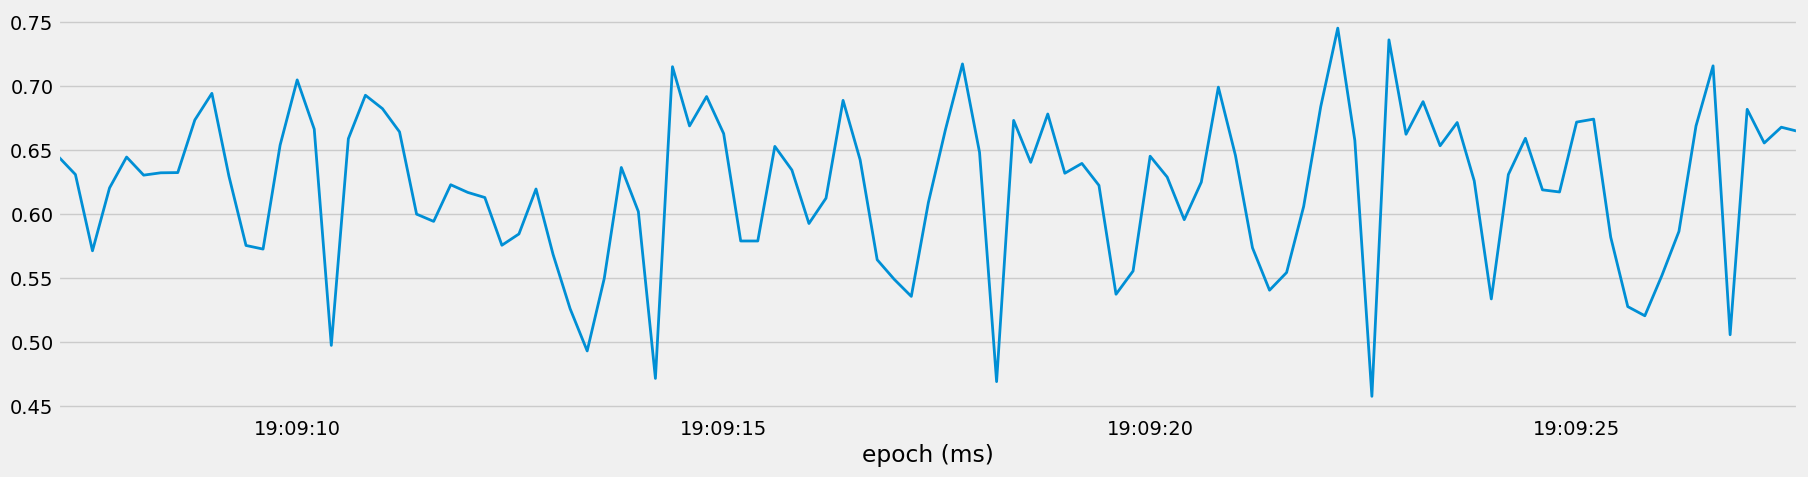

In [26]:
df[df["set"] == 25]["acce_y"].plot()

In [27]:
# The plot is for set 25, which correspond to squat - heavy. Butterworth Lowpass filter will filter out noise (or in this case, the subtle movements of the participant which translates to small values) and will result to much cleaner data - graph.

In [28]:
# That's why we need to calculate the duration first so that we know the set of time which to filter using the Butterworth lowpass filter.

In [29]:
single_duration = df[df["set"] == 1].index[-1] - df[df["set"] == 1].index[0]

In [30]:
single_duration

Timedelta('0 days 00:00:16.400000')

In [32]:
single_duration.seconds

16

In [33]:
# We can see that we can determine what is the duration of a single set. Now all we need to do is to loop this to all set.

In [34]:
df["set"].unique()

# This will output an array of all the array without repitition.

array([30,  1, 31,  3,  9, 32, 10, 33, 11, 34, 35, 15, 36, 16, 37, 17, 27,
       38, 28, 29,  6, 65, 67, 73,  4,  2, 39, 40, 12, 41, 13, 45, 14, 46,
       51, 22, 47, 23, 49, 68, 66, 76, 77, 78, 52, 83, 48, 85, 50, 24, 53,
       25, 54, 26, 55,  7, 42,  8, 43,  5, 44, 84, 86, 92, 93, 74, 75, 72,
       63, 64, 62, 56, 57, 18, 58, 20, 59, 60, 61, 69, 70, 19, 71, 21, 87,
       89, 91, 80, 82, 88, 90])

In [36]:
for per_set in df["set"].unique():
    
    start = df[df["set"] == per_set].index[0]
    end = df[df["set"] == per_set].index[-1]
    
    duration = end - start
    
    # This will make a new column "duration" and insert the
    # duration with respect to the current selected set.
    df.loc[(df["set"] == per_set), "duration"] = duration.seconds

In [37]:
df

acce_x    acce_y    acce_z  gyro_x  gyro_y  gyro_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                        participant  label category  set  duration  
epoch (ms)                                                          
2019-01-11 15:08:05.200           B  bench    heavy   30      16.0  
2019-01-11 15:08:05.400           B  bench    heavy   30      16.0  
2019-01-11 15:08:05.600           B  bench    heavy   30      16.0  
2019-01-11 15:08:05.800           B  bench    heavy   30      16.0  
2019-01-11 15:08:06.000           B  bench    heavy   30      16.0  
...                             ...    ...      ...  ...       ...  
2019-01-20 17:33:27.000           E    row   medium   90      19.0  
2019-01-20 17:33:27.200           E    row   medium   90      19.0  
2019-01-20 17:33:27.400           E    row   medium   90      19.0  
2019-01-20 17:33:27.600           E    row   medium   90      19.0  
2019-01-20 17:33:27.800           E    row   medium   90      19.0  

[9009 rows x 11 columns]

In [38]:
# As we can see, There's a new column "duration" with its corresponding duration per set.

In [39]:
df.groupby(["category"])["duration"].mean()

category
heavy       14.743501
medium      24.942529
sitting     33.000000
standing    39.000000
Name: duration, dtype: float64

In [40]:
df.groupby(["category"])["duration"].max()

category
heavy       20.0
medium      35.0
sitting     33.0
standing    39.0
Name: duration, dtype: float64

In [41]:
df.groupby(["category"])["duration"].min()

category
heavy        8.0
medium      13.0
sitting     33.0
standing    39.0
Name: duration, dtype: float64

In [42]:
# Now we can see the mean, max and min in each category of the dataframe.

In [43]:
mean_duration_df = df.groupby(["category"])["duration"].mean()

In [44]:
mean_duration_df

category
heavy       14.743501
medium      24.942529
sitting     33.000000
standing    39.000000
Name: duration, dtype: float64

In [46]:
# Getting the average for heavy:

mean_duration_df.iloc[0] / 5 # 5 since it repeats 5 times per set.

2.9487001733102254

In [47]:
# Getting the average for medium:

mean_duration_df.iloc[1] / 10 # 10 since it repeats 10 times per set. It is easier category that's why 10 repetition.

2.4942528735632186

In [48]:
df_lowpass = df.copy()
LowPass = LowPassFilter()

In [51]:
fs = 1000 / 200 # 5 readings per second (200ms)
cutoff = 1 # Trying 1 for now.

In [52]:
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acce_y", fs, cutoff, order=5)

In [53]:
df_lowpass

acce_x    acce_y    acce_z  gyro_x  gyro_y  gyro_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                        participant  label category  set  duration  \
epoch (ms)                                                           
2019-01-11 15:08:05.200           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.400           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.600           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.800           B  bench    heavy   30      16.0   
2019-01-11 15:08:06.000           B  bench    heavy   30      16.0   
...                             ...    ...      ...  ...       ...   
2019-01-20 17:33:27.000           E    row   medium   90      19.0   
2019-01-20 17:33:27.200           E    row   medium   90      19.0   
2019-01-20 17:33:27.400           E    row   medium   90      19.0   
2019-01-20 17:33:27.600           E    row   medium   90      19.0   
2019-01-20 17:33:27.800           E    row   medium   90      19.0   

                         acce_y_lowpass  
epoch (ms)                               
2019-01-11 15:08:05.200        0.977022  
2019-01-11 15:08:05.400        0.962269  
2019-01-11 15:08:05.600        0.966368  
2019-01-11 15:08:05.800        0.979343  
2019-01-11 15:08:06.000        0.966609  
...                                 ...  
2019-01-20 17:33:27.000       -1.010877  
2019-01-20 17:33:27.200       -0.986139  
2019-01-20 17:33:27.400       -1.026145  
2019-01-20 17:33:27.600       -1.052548  
2019-01-20 17:33:27.800       -1.034721  

[9009 rows x 12 columns]

In [54]:
# Now we can see that there's new column named "acce_y_lowpass"

In [55]:
subset = df_lowpass[df_lowpass["set"] == 45]

In [56]:
# Printing subset to see what category it has at set == 45 ; index 0 of label.

print(subset["label"][0])

ohp


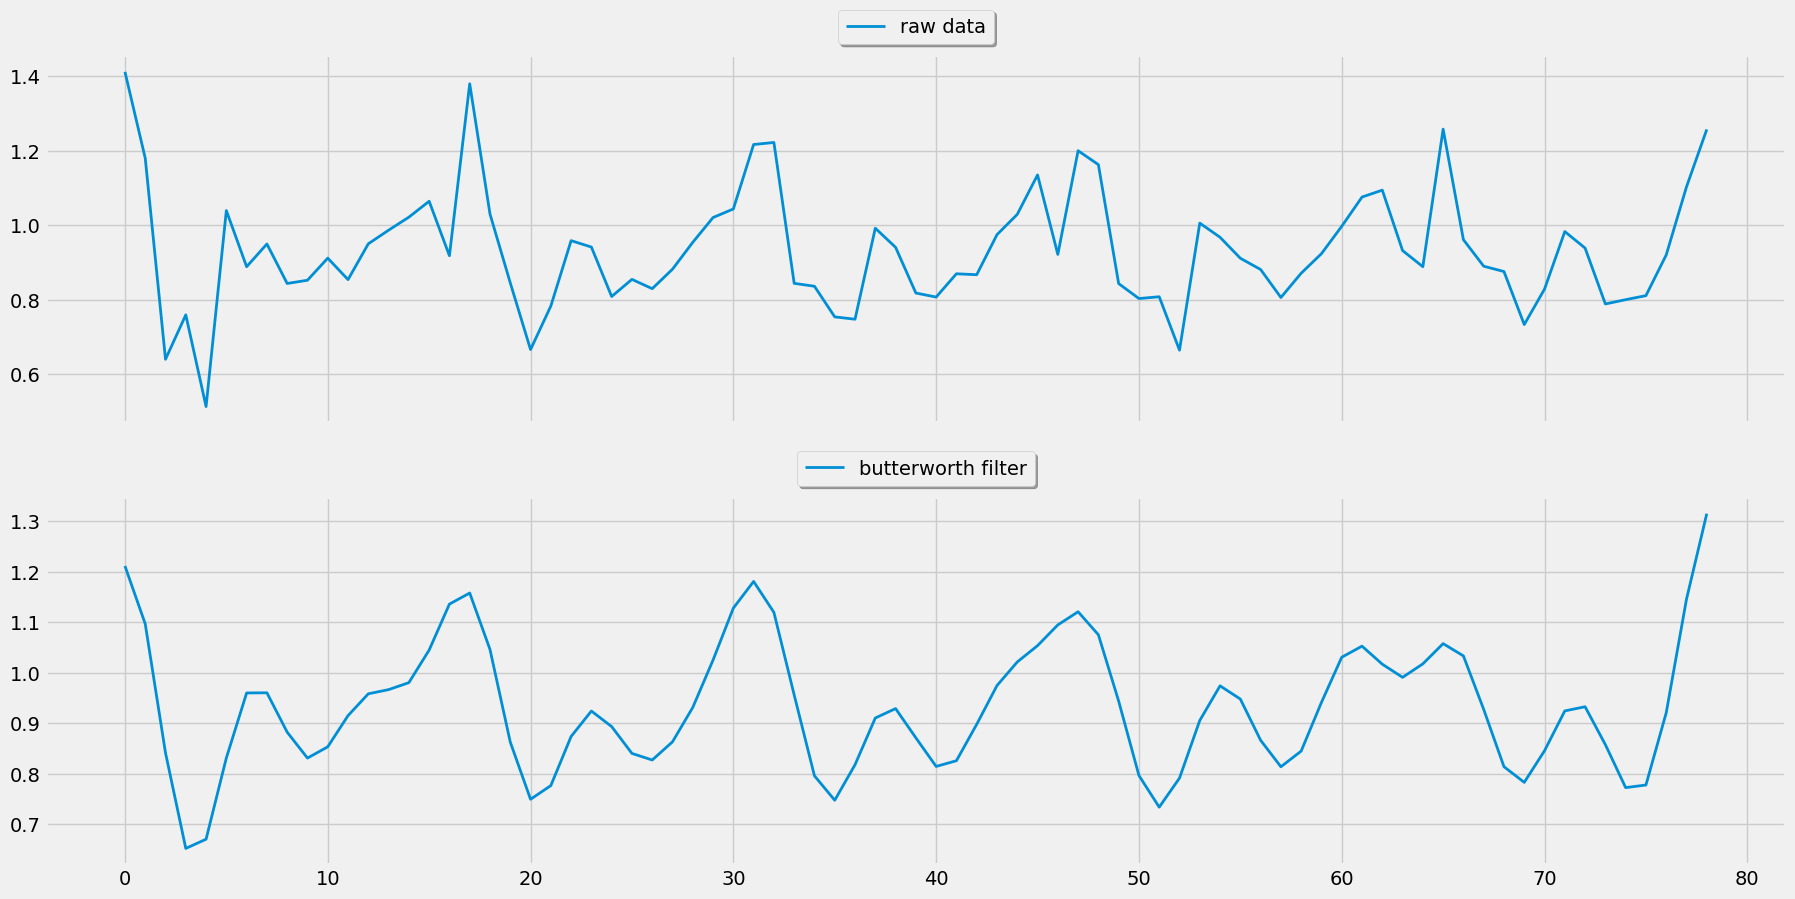

In [57]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acce_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acce_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)

In [59]:
# Now we can see that the data is much smoother than to the original data. All we need to do is to determine what is the right cutoff value to choose. We're going to plot each cutoff values and decide which value is the best.

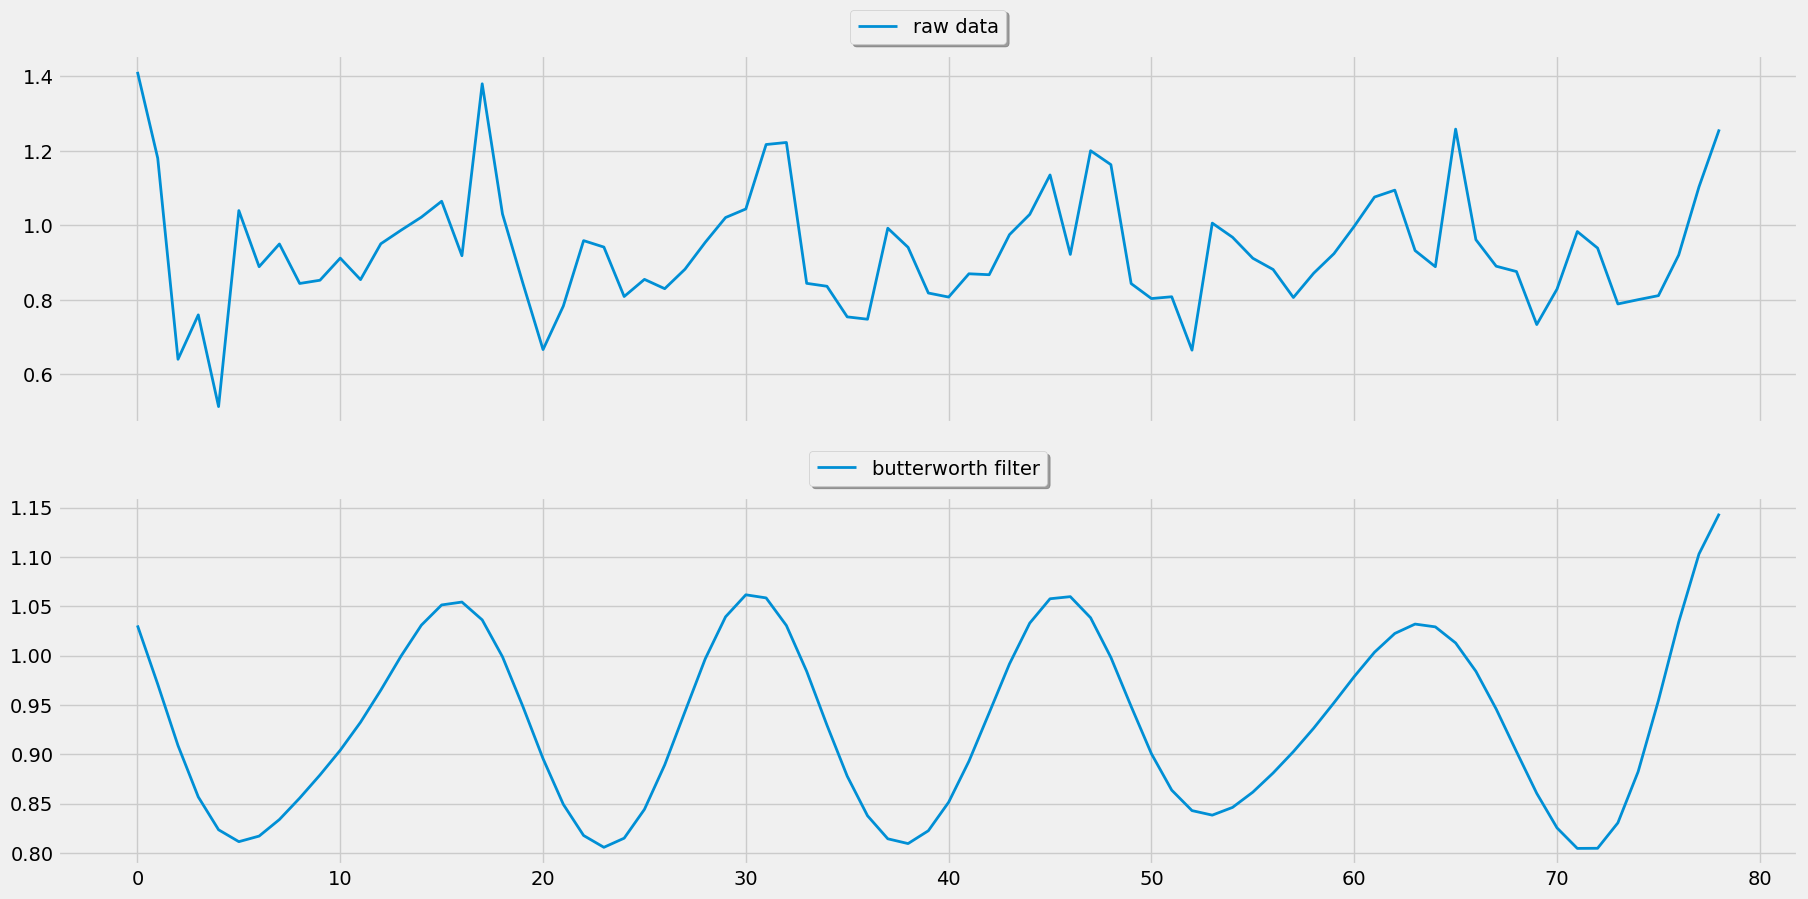

In [64]:
# Again, from cutoff = 0.5 to 1 to 2. First, cutoff = 0.5

cutoff = 0.5

    # Butterworth Lowpass Filter. Single column first. -- "acce_y"
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acce_y", fs, cutoff, order=5)

    # ------------------------------------------------------------
    # Making a subset top plot the of the original and the lowpass
    # ------------------------------------------------------------
subset = df_lowpass[df_lowpass["set"] == 45]

    # Styling
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acce_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acce_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)

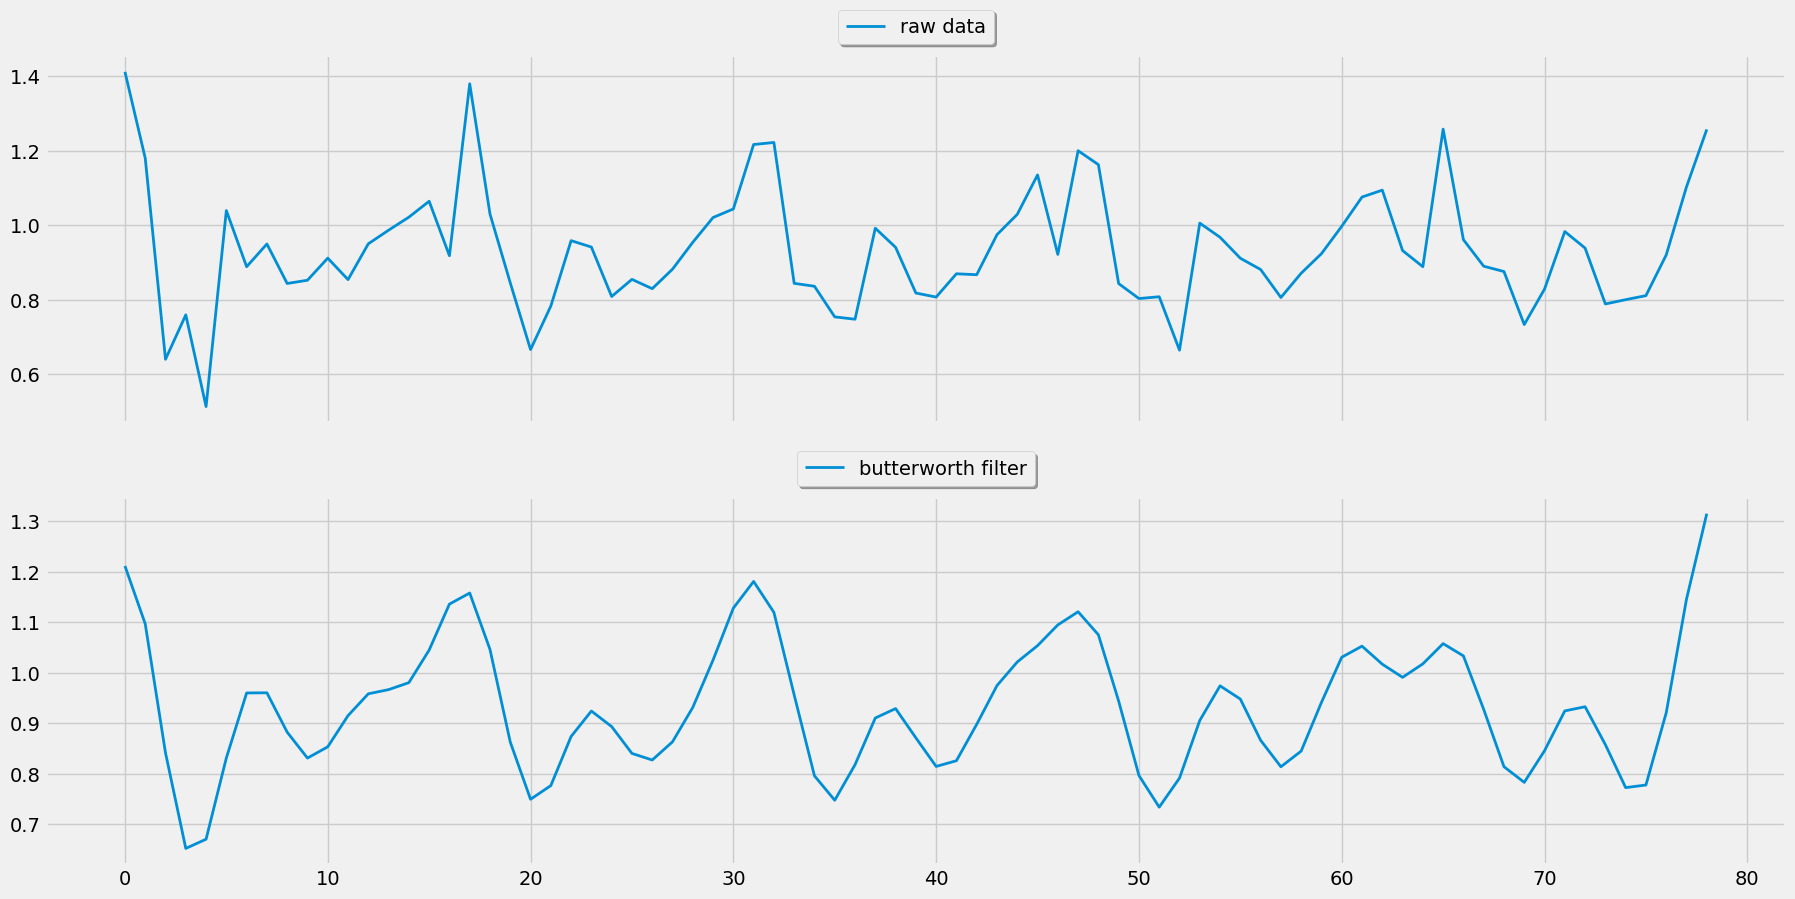

In [65]:
# cutoff = 1

cutoff = 1

    # Butterworth Lowpass Filter. Single column first. -- "acce_y"
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acce_y", fs, cutoff, order=5)

    # ------------------------------------------------------------
    # Making a subset top plot the of the original and the lowpass
    # ------------------------------------------------------------
subset = df_lowpass[df_lowpass["set"] == 45]

    # Styling
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acce_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acce_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)

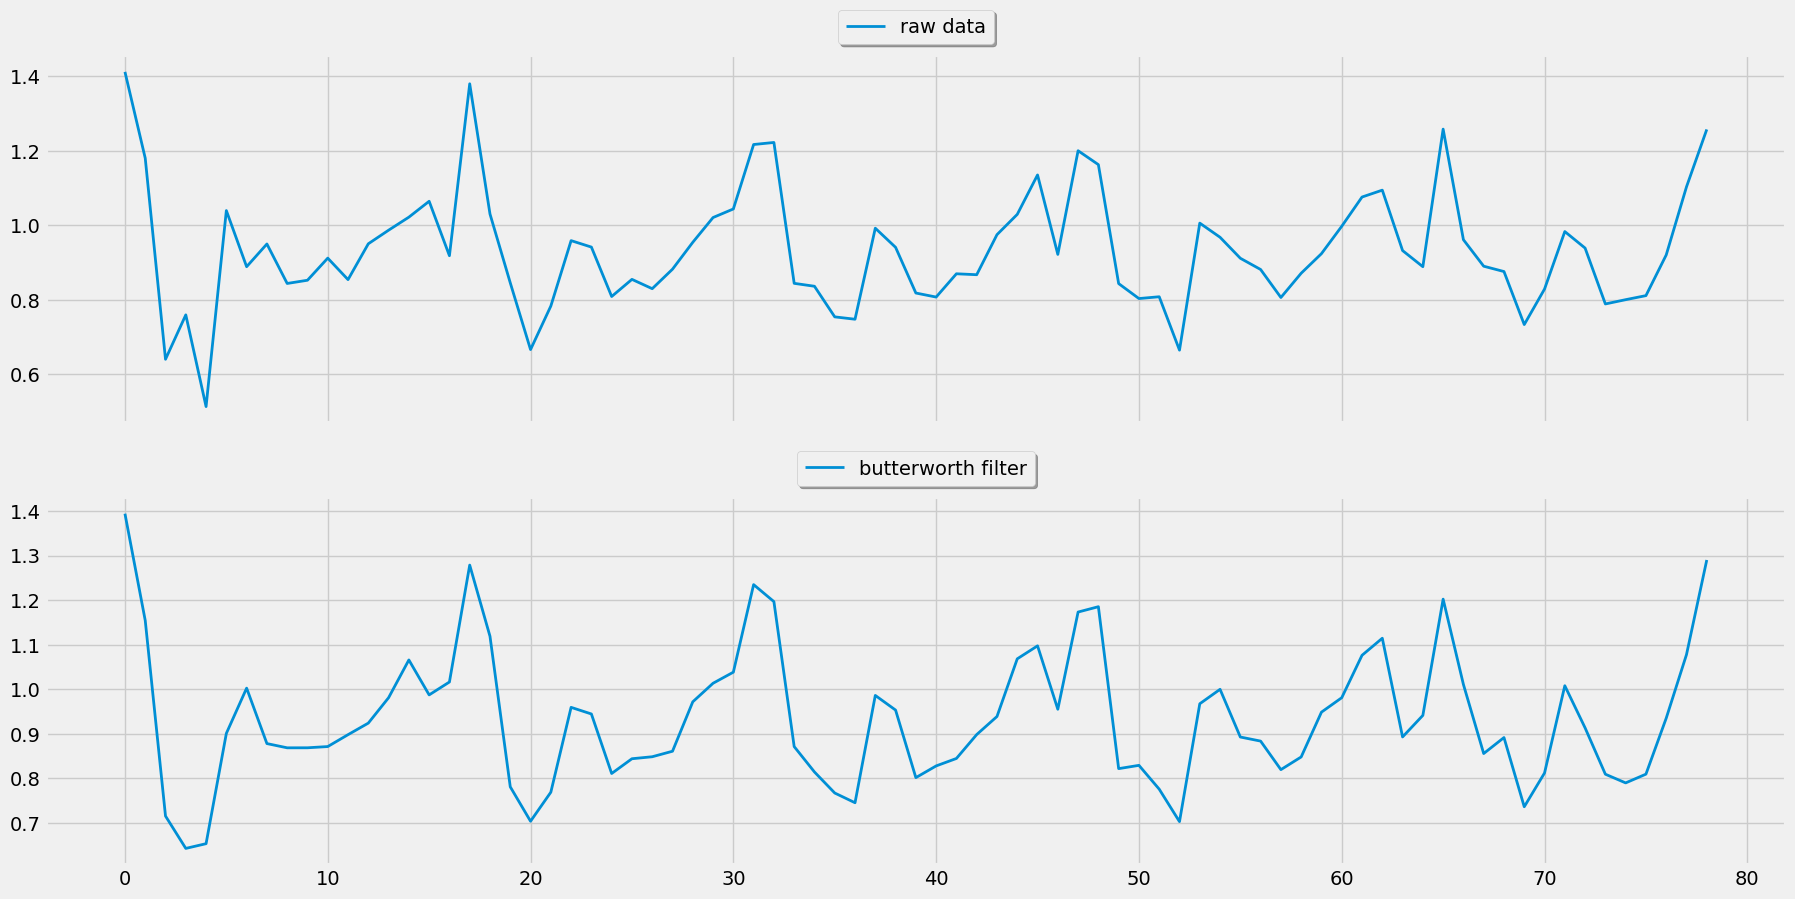

In [66]:
# And cutoff = 2

cutoff = 2

    # Butterworth Lowpass Filter. Single column first. -- "acce_y"
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acce_y", fs, cutoff, order=5)

    # ------------------------------------------------------------
    # Making a subset top plot the of the original and the lowpass
    # ------------------------------------------------------------
subset = df_lowpass[df_lowpass["set"] == 45]

    # Styling
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acce_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acce_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)

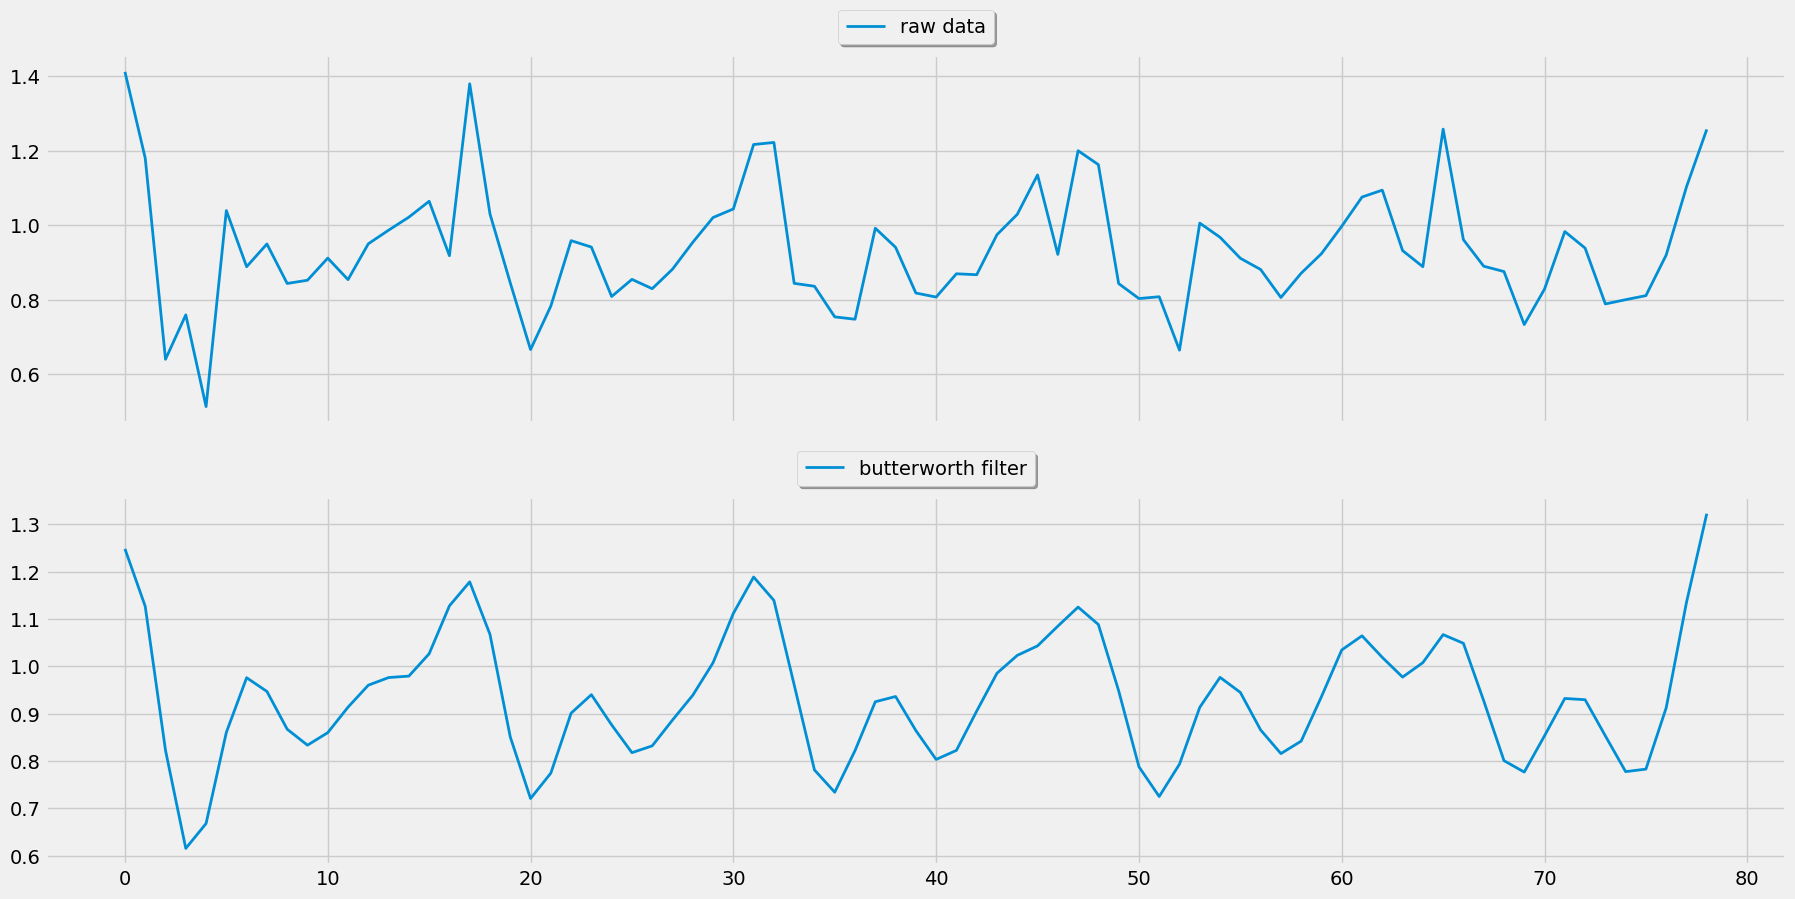

In [67]:
# Leaning to 1... Now we do some decimal. 1.1 -- 1.2 -- 1.3 -- 1.4

cutoff = 1.1

    # Butterworth Lowpass Filter. Single column first. -- "acce_y"
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acce_y", fs, cutoff, order=5)

    # ------------------------------------------------------------
    # Making a subset top plot the of the original and the lowpass
    # ------------------------------------------------------------
subset = df_lowpass[df_lowpass["set"] == 45]

    # Styling
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acce_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acce_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)

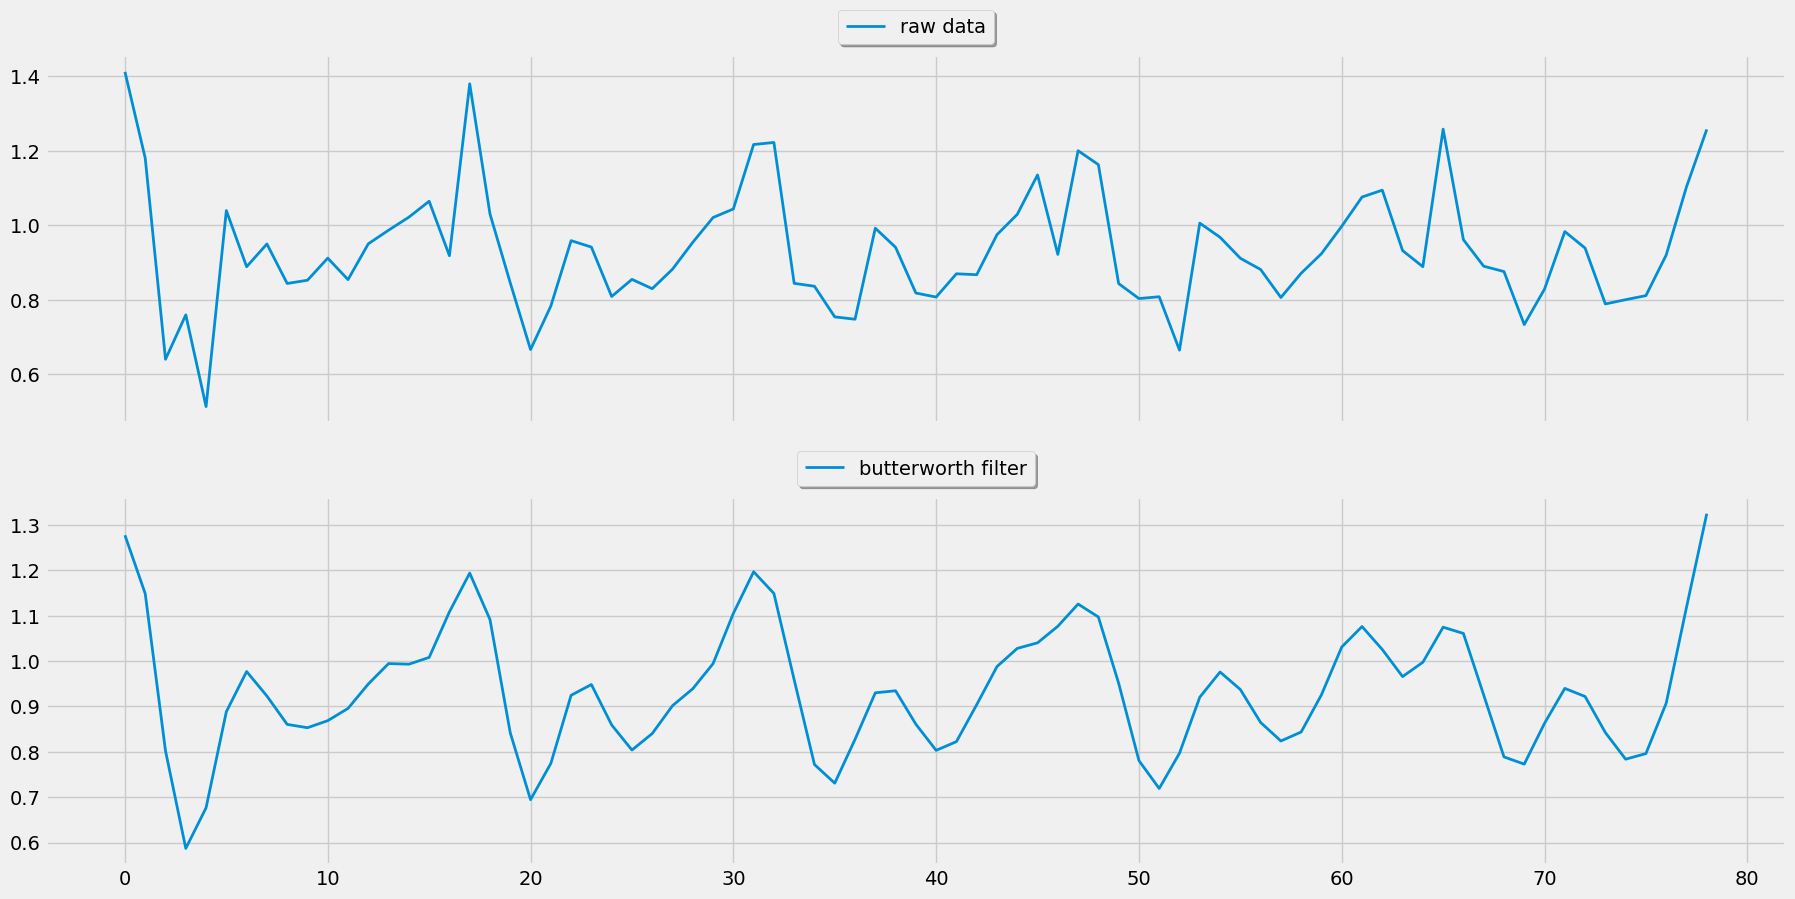

In [68]:
# cutoff = 1.2

cutoff = 1.2

    # Butterworth Lowpass Filter. Single column first. -- "acce_y"
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acce_y", fs, cutoff, order=5)

    # ------------------------------------------------------------
    # Making a subset top plot the of the original and the lowpass
    # ------------------------------------------------------------
subset = df_lowpass[df_lowpass["set"] == 45]

    # Styling
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acce_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acce_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)

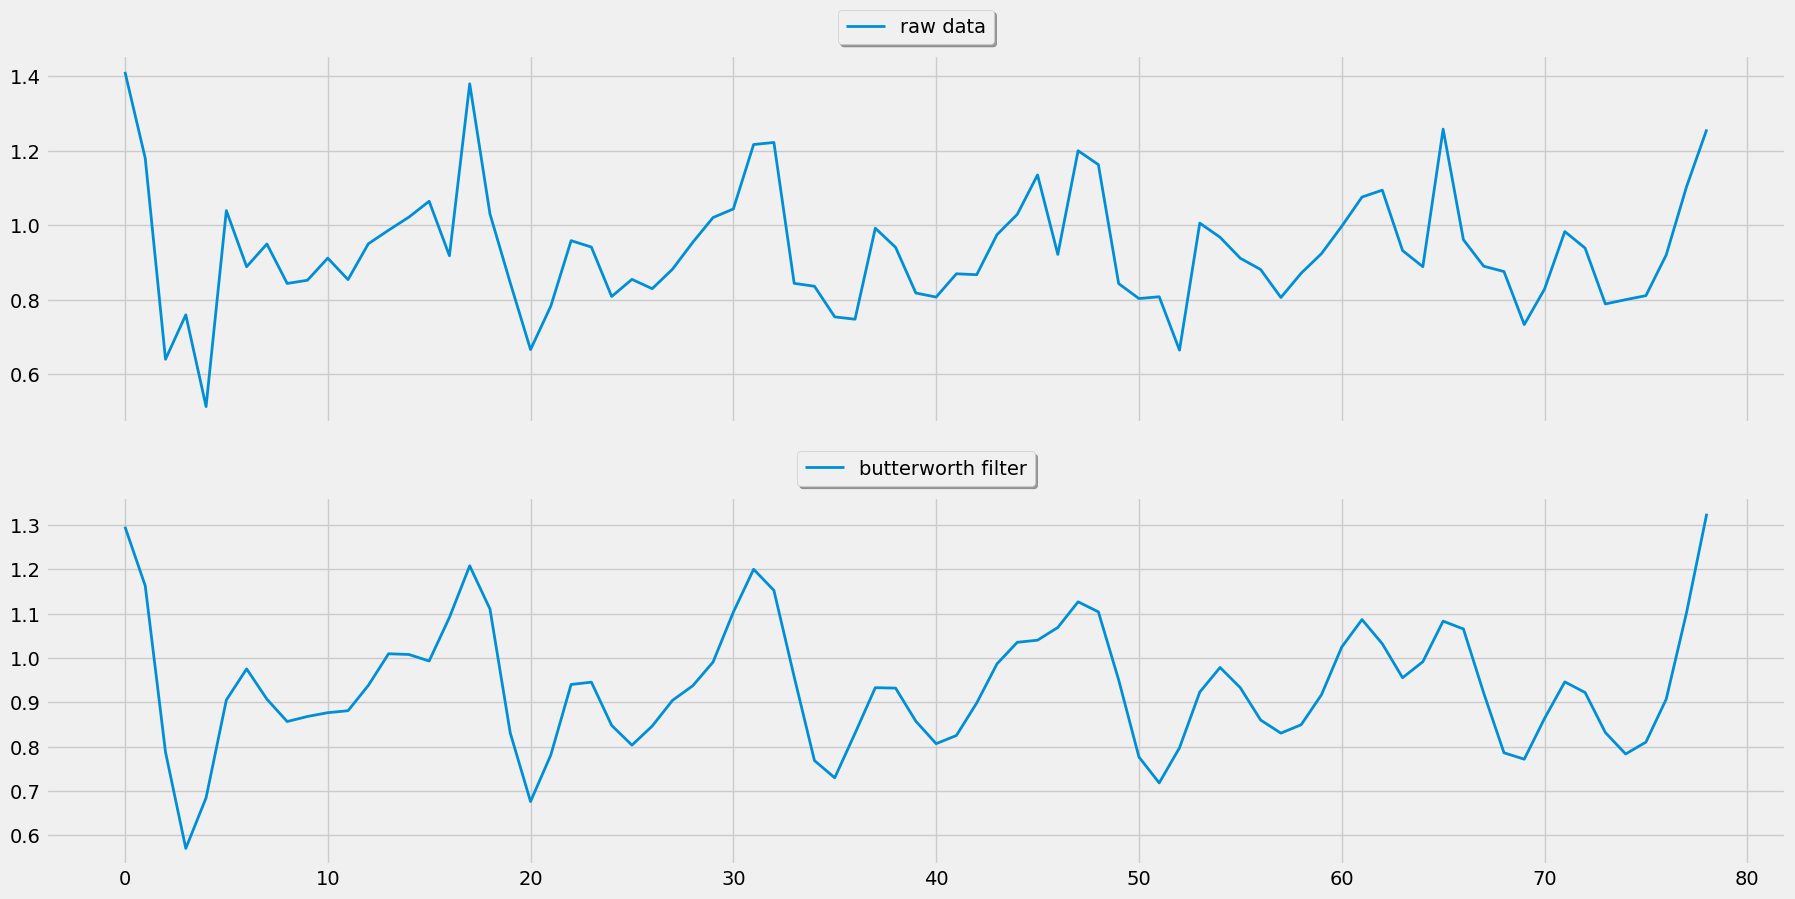

In [69]:
# cutoff = 1.3

cutoff = 1.3

    # Butterworth Lowpass Filter. Single column first. -- "acce_y"
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acce_y", fs, cutoff, order=5)

    # ------------------------------------------------------------
    # Making a subset top plot the of the original and the lowpass
    # ------------------------------------------------------------
subset = df_lowpass[df_lowpass["set"] == 45]

    # Styling
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acce_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acce_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)

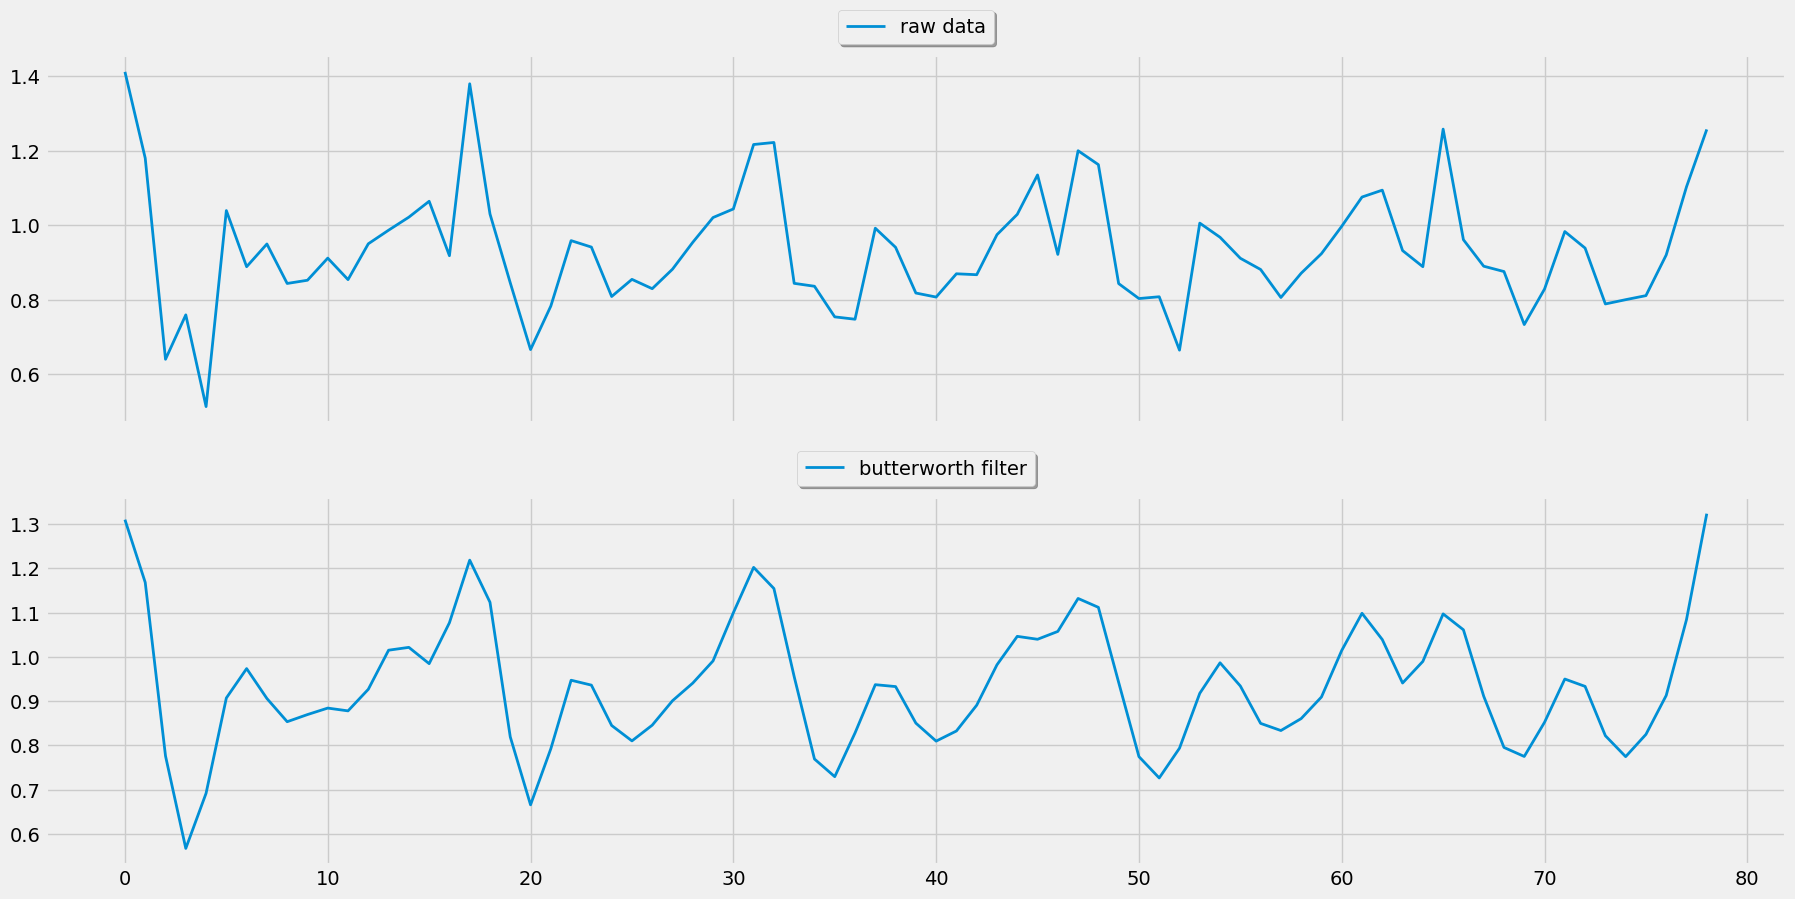

In [70]:
# cutoff = 1.4

cutoff = 1.4

    # Butterworth Lowpass Filter. Single column first. -- "acce_y"
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acce_y", fs, cutoff, order=5)

    # ------------------------------------------------------------
    # Making a subset top plot the of the original and the lowpass
    # ------------------------------------------------------------
subset = df_lowpass[df_lowpass["set"] == 45]

    # Styling
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acce_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acce_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)

In [71]:
# Will choose 1.3

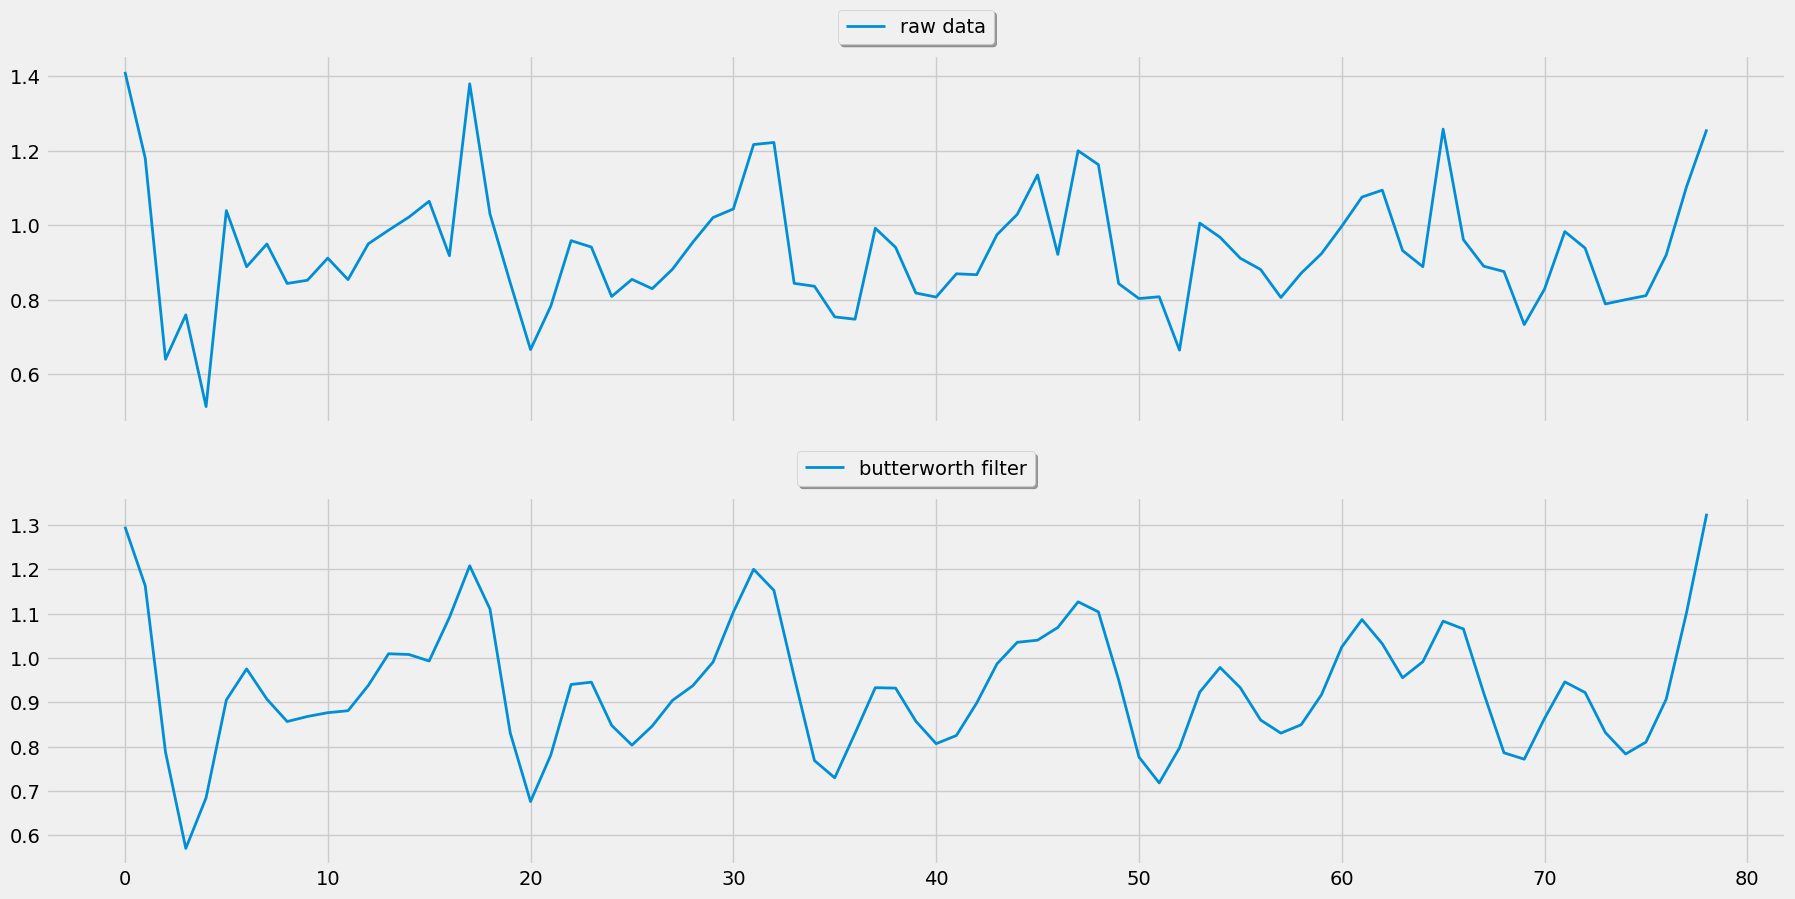

In [72]:
cutoff = 1.3

    # Butterworth Lowpass Filter. Single column first. -- "acce_y"
df_lowpass = LowPass.low_pass_filter(df_lowpass, "acce_y", fs, cutoff, order=5)

    # ------------------------------------------------------------
    # Making a subset top plot the of the original and the lowpass
    # ------------------------------------------------------------
subset = df_lowpass[df_lowpass["set"] == 45]

    # Styling
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acce_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acce_y_lowpass"].reset_index(drop=True), label="butterworth filter")
ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)

In [73]:
predictor_columns

['acce_x', 'acce_y', 'acce_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [74]:
# Running this again so that our lowpass df is cleaned.

df_lowpass = df.copy()

In [75]:
df_lowpass

acce_x    acce_y    acce_z  gyro_x  gyro_y  gyro_z  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200  0.013500  0.977000 -0.071000 -1.8904  2.4392  0.9388   
2019-01-11 15:08:05.400 -0.001500  0.970500 -0.079500 -1.6826 -0.8904  2.1708   
2019-01-11 15:08:05.600  0.001333  0.971667 -0.064333  2.5608 -0.2560 -1.4146   
2019-01-11 15:08:05.800 -0.024000  0.957000 -0.073500  8.0610 -4.5244 -2.0730   
2019-01-11 15:08:06.000 -0.028000  0.957667 -0.115000  2.4390 -1.5486 -3.6098   
...                           ...       ...       ...     ...     ...     ...   
2019-01-20 17:33:27.000 -0.048000 -1.041500 -0.076500  1.4146 -5.6218  0.2926   
2019-01-20 17:33:27.200 -0.037000 -1.030333 -0.053333 -2.7684 -0.5854  2.2440   
2019-01-20 17:33:27.400 -0.060000 -1.031000 -0.082000  2.8416 -5.1342 -0.1220   
2019-01-20 17:33:27.600 -0.038667 -1.025667 -0.044667 -0.2318  0.2562  1.1220   
2019-01-20 17:33:27.800 -0.044000 -1.034000 -0.059000  1.0980 -4.0240  0.9760   

                        participant  label category  set  duration  
epoch (ms)                                                          
2019-01-11 15:08:05.200           B  bench    heavy   30      16.0  
2019-01-11 15:08:05.400           B  bench    heavy   30      16.0  
2019-01-11 15:08:05.600           B  bench    heavy   30      16.0  
2019-01-11 15:08:05.800           B  bench    heavy   30      16.0  
2019-01-11 15:08:06.000           B  bench    heavy   30      16.0  
...                             ...    ...      ...  ...       ...  
2019-01-20 17:33:27.000           E    row   medium   90      19.0  
2019-01-20 17:33:27.200           E    row   medium   90      19.0  
2019-01-20 17:33:27.400           E    row   medium   90      19.0  
2019-01-20 17:33:27.600           E    row   medium   90      19.0  
2019-01-20 17:33:27.800           E    row   medium   90      19.0  

[9009 rows x 11 columns]

In [76]:
for per_col in predictor_columns:
    df_lowpass = LowPass.low_pass_filter(df_lowpass, per_col, fs, cutoff, order=5)
    
    # This two lines will overwrite the original and delete the excess.
    df_lowpass[per_col] = df_lowpass[per_col + "_lowpass"]
    del df_lowpass[per_col + "_lowpass"]

In [77]:
df_lowpass

acce_x    acce_y    acce_z    gyro_x    gyro_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013503  0.977003 -0.071001 -1.886218  2.438803   
2019-01-11 15:08:05.400  0.008515  0.973169 -0.066481 -0.367396  0.439794   
2019-01-11 15:08:05.600 -0.008450  0.966879 -0.071895  4.320608 -2.083978   
2019-01-11 15:08:05.800 -0.024359  0.962244 -0.084774  4.737252 -3.456339   
2019-01-11 15:08:06.000 -0.022092  0.959572 -0.096776  0.808615 -1.194575   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545  2.032956 -4.019557   
2019-01-20 17:33:27.200 -0.041403 -1.053448 -0.064530 -2.967835 -2.660315   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951 -0.043109 -2.022091   
2019-01-20 17:33:27.600 -0.050572 -1.010599 -0.060327  3.033517 -2.427441   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316  1.105070 -4.020475   

                           gyro_z participant  label category  set  duration  
epoch (ms)                                                                    
2019-01-11 15:08:05.200  0.937522           B  bench    heavy   30      16.0  
2019-01-11 15:08:05.400  0.178360           B  bench    heavy   30      16.0  
2019-01-11 15:08:05.600 -1.217263           B  bench    heavy   30      16.0  
2019-01-11 15:08:05.800 -0.678205           B  bench    heavy   30      16.0  
2019-01-11 15:08:06.000 -1.783172           B  bench    heavy   30      16.0  
...                           ...         ...    ...      ...  ...       ...  
2019-01-20 17:33:27.000  0.196986           E    row   medium   90      19.0  
2019-01-20 17:33:27.200  1.584934           E    row   medium   90      19.0  
2019-01-20 17:33:27.400  1.155930           E    row   medium   90      19.0  
2019-01-20 17:33:27.600  0.279918           E    row   medium   90      19.0  
2019-01-20 17:33:27.800  0.974497           E    row   medium   90      19.0  

[9009 rows x 11 columns]

In [78]:
# Now we can see that the values are overwritten with the lowpass filter.

In [79]:
df_lowpass.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acce_x       9009 non-null   float64
 1   acce_y       9009 non-null   float64
 2   acce_z       9009 non-null   float64
 3   gyro_x       9009 non-null   float64
 4   gyro_y       9009 non-null   float64
 5   gyro_z       9009 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int32  
 10  duration     9009 non-null   float64
dtypes: float64(7), int32(1), object(3)
memory usage: 809.4+ KB


In [80]:
df_pca = df_lowpass.copy()

In [81]:
PCA = PrincipalComponentAnalysis()

In [82]:
pc_values = PCA.determine_pc_explained_variance(df_pca, predictor_columns)

In [83]:
pc_values

array([0.57992901, 0.27309479, 0.06509761, 0.05306529, 0.01866432,
       0.01014897])

In [84]:
# values for each column.

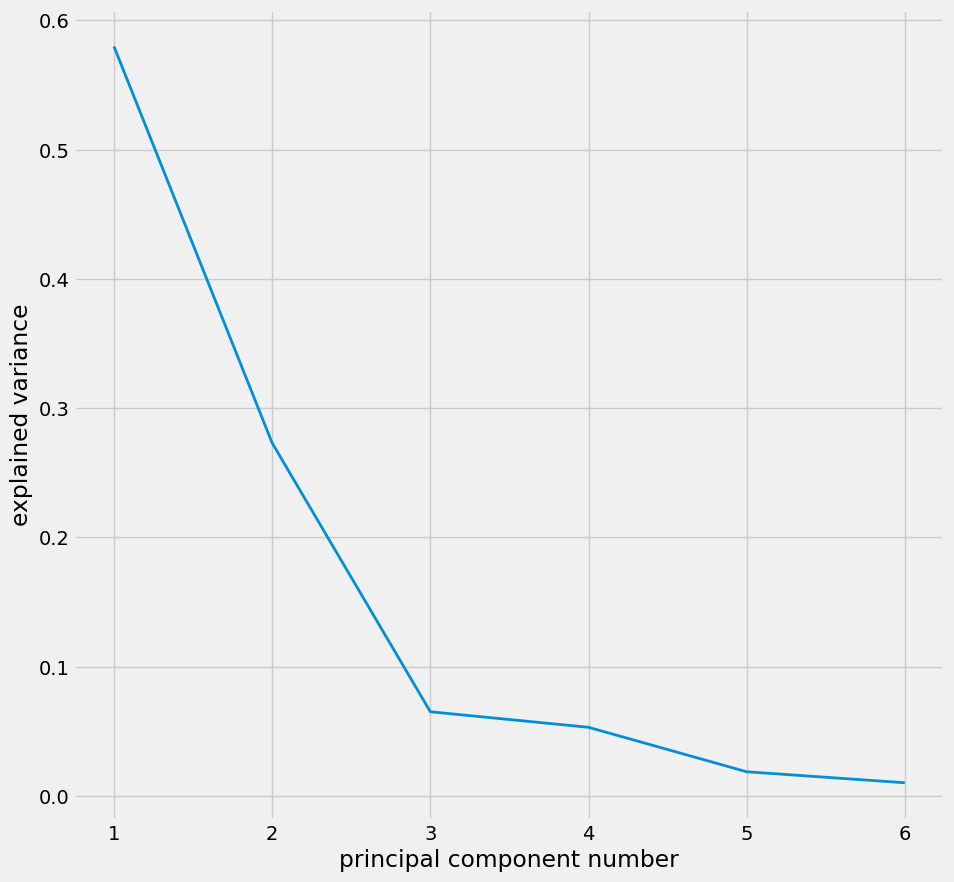

In [85]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, len(predictor_columns) + 1), pc_values)
plt.xlabel("principal component number")
plt.ylabel("explained variance")
plt.show()

In [86]:
# "Elbow Technique". This let us see the diminishing value (in pc number) in which increasing the value leads to very little improvements in our analysis. In this case, pc number is 3.

In [87]:
df_pca = PCA.apply_pca(df_pca, predictor_columns, 3)

In [88]:
df_pca

acce_x    acce_y    acce_z    gyro_x    gyro_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013503  0.977003 -0.071001 -1.886218  2.438803   
2019-01-11 15:08:05.400  0.008515  0.973169 -0.066481 -0.367396  0.439794   
2019-01-11 15:08:05.600 -0.008450  0.966879 -0.071895  4.320608 -2.083978   
2019-01-11 15:08:05.800 -0.024359  0.962244 -0.084774  4.737252 -3.456339   
2019-01-11 15:08:06.000 -0.022092  0.959572 -0.096776  0.808615 -1.194575   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545  2.032956 -4.019557   
2019-01-20 17:33:27.200 -0.041403 -1.053448 -0.064530 -2.967835 -2.660315   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951 -0.043109 -2.022091   
2019-01-20 17:33:27.600 -0.050572 -1.010599 -0.060327  3.033517 -2.427441   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316  1.105070 -4.020475   

                           gyro_z participant  label category  set  duration  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200  0.937522           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.400  0.178360           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.600 -1.217263           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.800 -0.678205           B  bench    heavy   30      16.0   
2019-01-11 15:08:06.000 -1.783172           B  bench    heavy   30      16.0   
...                           ...         ...    ...      ...  ...       ...   
2019-01-20 17:33:27.000  0.196986           E    row   medium   90      19.0   
2019-01-20 17:33:27.200  1.584934           E    row   medium   90      19.0   
2019-01-20 17:33:27.400  1.155930           E    row   medium   90      19.0   
2019-01-20 17:33:27.600  0.279918           E    row   medium   90      19.0   
2019-01-20 17:33:27.800  0.974497           E    row   medium   90      19.0   

                            pca_1     pca_2     pca_3  
epoch (ms)                                             
2019-01-11 15:08:05.200 -0.315889 -0.075461  0.072243  
2019-01-11 15:08:05.400 -0.314873 -0.073888  0.069825  
2019-01-11 15:08:05.600 -0.314236 -0.080343  0.066219  
2019-01-11 15:08:05.800 -0.314356 -0.090852  0.061839  
2019-01-11 15:08:06.000 -0.313630 -0.097479  0.062974  
...                           ...       ...       ...  
2019-01-20 17:33:27.000  0.349351 -0.148450 -0.053031  
2019-01-20 17:33:27.200  0.371610 -0.151455 -0.058498  
2019-01-20 17:33:27.400  0.368098 -0.153153 -0.058772  
2019-01-20 17:33:27.600  0.356453 -0.149165 -0.057320  
2019-01-20 17:33:27.800  0.365317 -0.148295 -0.057171  

[9009 rows x 14 columns]

In [90]:
# The three new column (pca 1 to 3), explained the 6 columns the same. Later, we're going to see if the PCA values performs better to our Butterworth lowpass filter values. 

In [95]:
subset = df_pca[df_pca["set"] == 35]

In [96]:
subset

acce_x    acce_y    acce_z     gyro_x     gyro_y  \
epoch (ms)                                                                    
2019-01-11 15:48:54.800 -0.094396  0.891041 -0.005994  -2.338054  -3.884629   
2019-01-11 15:48:55.000 -0.093845  0.953323  0.080001  -3.814675  -2.375120   
2019-01-11 15:48:55.200 -0.133457  1.182284  0.049543   0.341722  -5.827977   
2019-01-11 15:48:55.400 -0.214620  1.266713 -0.097444   1.836545 -15.200894   
2019-01-11 15:48:55.600 -0.297162  1.034657 -0.229331  -8.084908 -15.295883   
...                           ...       ...       ...        ...        ...   
2019-01-11 15:49:15.600 -0.351624  0.948756 -0.227174 -20.037197 -17.034945   
2019-01-11 15:49:15.800 -0.424993  1.266271 -0.151429 -47.826553 -23.376297   
2019-01-11 15:49:16.000 -0.335881  1.171543 -0.035990 -28.663875 -19.242887   
2019-01-11 15:49:16.200 -0.201262  0.943999  0.028735   0.886577 -12.261346   
2019-01-11 15:49:16.400 -0.127582  0.907911  0.023205   7.700050  -6.844945   

                            gyro_z participant label category  set  duration  \
epoch (ms)                                                                     
2019-01-11 15:48:54.800   1.745296           B   ohp   medium   35      21.0   
2019-01-11 15:48:55.000   4.447539           B   ohp   medium   35      21.0   
2019-01-11 15:48:55.200 -14.474650           B   ohp   medium   35      21.0   
2019-01-11 15:48:55.400 -38.378502           B   ohp   medium   35      21.0   
2019-01-11 15:48:55.600 -34.485185           B   ohp   medium   35      21.0   
...                            ...         ...   ...      ...  ...       ...   
2019-01-11 15:49:15.600   1.458312           B   ohp   medium   35      21.0   
2019-01-11 15:49:15.800  24.493841           B   ohp   medium   35      21.0   
2019-01-11 15:49:16.000  14.107873           B   ohp   medium   35      21.0   
2019-01-11 15:49:16.200   1.014151           B   ohp   medium   35      21.0   
2019-01-11 15:49:16.400   2.049325           B   ohp   medium   35      21.0   

                            pca_1     pca_2     pca_3  
epoch (ms)                                             
2019-01-11 15:48:54.800 -0.294343 -0.059385  0.003727  
2019-01-11 15:48:55.000 -0.313398 -0.006771 -0.013395  
2019-01-11 15:48:55.200 -0.395533 -0.023779 -0.008200  
2019-01-11 15:48:55.400 -0.435004 -0.121345 -0.004419  
2019-01-11 15:48:55.600 -0.366605 -0.220814 -0.031165  
...                           ...       ...       ...  
2019-01-11 15:49:15.600 -0.342327 -0.231862 -0.072531  
2019-01-11 15:49:15.800 -0.455707 -0.189263 -0.127620  
2019-01-11 15:49:16.000 -0.412323 -0.109535 -0.104000  
2019-01-11 15:49:16.200 -0.320745 -0.056138 -0.047874  
2019-01-11 15:49:16.400 -0.302022 -0.047674 -0.010493  

[109 rows x 14 columns]

In [97]:
# ohp

<AxesSubplot: xlabel='epoch (ms)'>

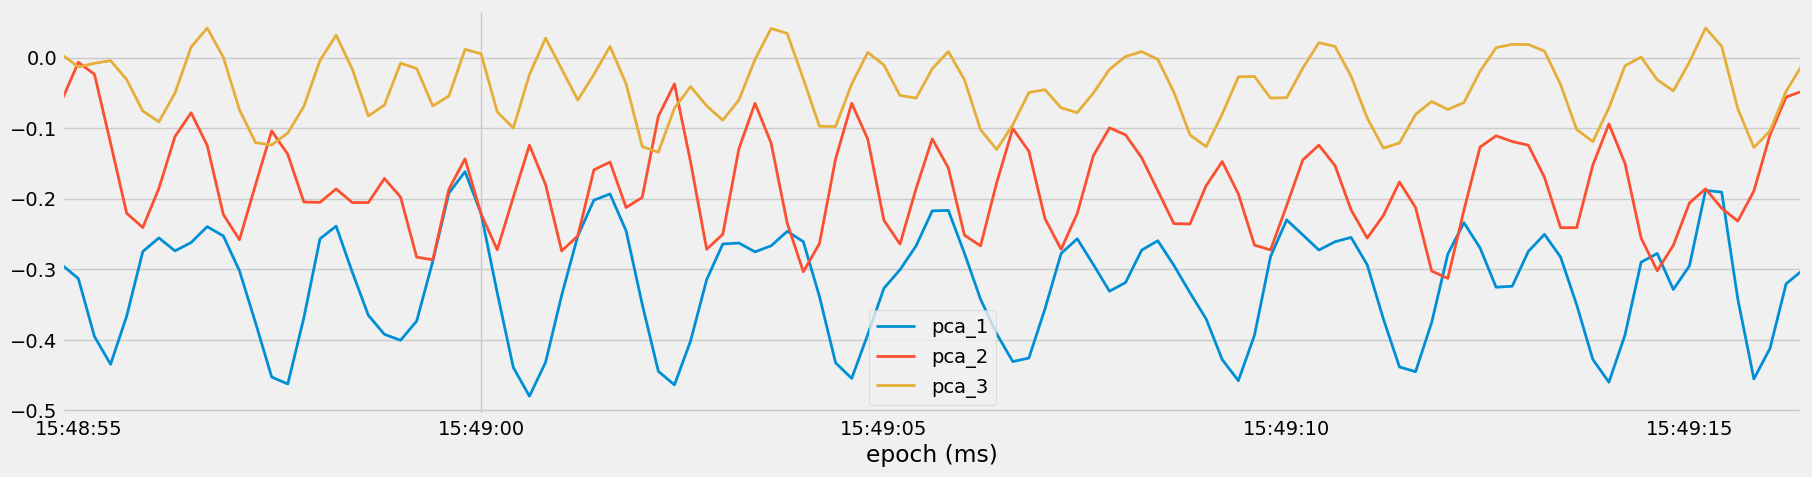

In [98]:
subset[["pca_1", "pca_2", "pca_3"]].plot()

In [99]:
# Now we can see the graph of the ohp @ set 35 with PCA values.

In [100]:
df_pca

acce_x    acce_y    acce_z    gyro_x    gyro_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013503  0.977003 -0.071001 -1.886218  2.438803   
2019-01-11 15:08:05.400  0.008515  0.973169 -0.066481 -0.367396  0.439794   
2019-01-11 15:08:05.600 -0.008450  0.966879 -0.071895  4.320608 -2.083978   
2019-01-11 15:08:05.800 -0.024359  0.962244 -0.084774  4.737252 -3.456339   
2019-01-11 15:08:06.000 -0.022092  0.959572 -0.096776  0.808615 -1.194575   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545  2.032956 -4.019557   
2019-01-20 17:33:27.200 -0.041403 -1.053448 -0.064530 -2.967835 -2.660315   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951 -0.043109 -2.022091   
2019-01-20 17:33:27.600 -0.050572 -1.010599 -0.060327  3.033517 -2.427441   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316  1.105070 -4.020475   

                           gyro_z participant  label category  set  duration  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200  0.937522           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.400  0.178360           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.600 -1.217263           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.800 -0.678205           B  bench    heavy   30      16.0   
2019-01-11 15:08:06.000 -1.783172           B  bench    heavy   30      16.0   
...                           ...         ...    ...      ...  ...       ...   
2019-01-20 17:33:27.000  0.196986           E    row   medium   90      19.0   
2019-01-20 17:33:27.200  1.584934           E    row   medium   90      19.0   
2019-01-20 17:33:27.400  1.155930           E    row   medium   90      19.0   
2019-01-20 17:33:27.600  0.279918           E    row   medium   90      19.0   
2019-01-20 17:33:27.800  0.974497           E    row   medium   90      19.0   

                            pca_1     pca_2     pca_3  
epoch (ms)                                             
2019-01-11 15:08:05.200 -0.315889 -0.075461  0.072243  
2019-01-11 15:08:05.400 -0.314873 -0.073888  0.069825  
2019-01-11 15:08:05.600 -0.314236 -0.080343  0.066219  
2019-01-11 15:08:05.800 -0.314356 -0.090852  0.061839  
2019-01-11 15:08:06.000 -0.313630 -0.097479  0.062974  
...                           ...       ...       ...  
2019-01-20 17:33:27.000  0.349351 -0.148450 -0.053031  
2019-01-20 17:33:27.200  0.371610 -0.151455 -0.058498  
2019-01-20 17:33:27.400  0.368098 -0.153153 -0.058772  
2019-01-20 17:33:27.600  0.356453 -0.149165 -0.057320  
2019-01-20 17:33:27.800  0.365317 -0.148295 -0.057171  

[9009 rows x 14 columns]

In [102]:
df_squared = df_pca.copy()

In [103]:
acce_r = df_squared["acce_x"] ** 2 + df_squared["acce_y"] ** 2 + df_squared["acce_z"] ** 2

In [104]:
gyro_r = df_squared["gyro_x"] ** 2 + df_squared["gyro_y"] ** 2 + df_squared["gyro_z"] ** 2

In [105]:
acce_r

epoch (ms)
2019-01-11 15:08:05.200    0.959758
2019-01-11 15:08:05.400    0.951550
2019-01-11 15:08:05.600    0.940095
2019-01-11 15:08:05.800    0.933694
2019-01-11 15:08:06.000    0.930633
                             ...   
2019-01-20 17:33:27.000    0.982231
2019-01-20 17:33:27.200    1.115630
2019-01-20 17:33:27.400    1.098133
2019-01-20 17:33:27.600    1.027507
2019-01-20 17:33:27.800    1.076688
Length: 9009, dtype: float64

In [106]:
gyro_r

epoch (ms)
2019-01-11 15:08:05.200    10.384526
2019-01-11 15:08:05.400     0.360211
2019-01-11 15:08:05.600    24.492348
2019-01-11 15:08:05.800    34.847803
2019-01-11 15:08:06.000     5.260569
                             ...    
2019-01-20 17:33:27.000    20.328548
2019-01-20 17:33:27.200    18.397341
2019-01-20 17:33:27.400     5.426886
2019-01-20 17:33:27.600    15.173048
2019-01-20 17:33:27.800    18.335044
Length: 9009, dtype: float64

In [107]:
# squared the values of accelerometer's x,y,z and adding it together, also to gyroscope's x,y,z

In [108]:
# Now those values, we will square-root it, then will make a new column in the DF, and insert those values into the DF.

In [109]:
# Checking the square root values first:

In [110]:
np.sqrt(acce_r)

epoch (ms)
2019-01-11 15:08:05.200    0.979672
2019-01-11 15:08:05.400    0.975474
2019-01-11 15:08:05.600    0.969585
2019-01-11 15:08:05.800    0.966278
2019-01-11 15:08:06.000    0.964693
                             ...   
2019-01-20 17:33:27.000    0.991076
2019-01-20 17:33:27.200    1.056234
2019-01-20 17:33:27.400    1.047919
2019-01-20 17:33:27.600    1.013660
2019-01-20 17:33:27.800    1.037636
Length: 9009, dtype: float64

In [111]:
np.sqrt(gyro_r)

epoch (ms)
2019-01-11 15:08:05.200    3.222503
2019-01-11 15:08:05.400    0.600176
2019-01-11 15:08:05.600    4.948974
2019-01-11 15:08:05.800    5.903203
2019-01-11 15:08:06.000    2.293593
                             ...   
2019-01-20 17:33:27.000    4.508719
2019-01-20 17:33:27.200    4.289212
2019-01-20 17:33:27.400    2.329568
2019-01-20 17:33:27.600    3.895260
2019-01-20 17:33:27.800    4.281944
Length: 9009, dtype: float64

In [112]:
df_squared["acce_r"] = np.sqrt(acce_r)
df_squared["gyro_r"] = np.sqrt(gyro_r)

In [113]:
df_squared

acce_x    acce_y    acce_z    gyro_x    gyro_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013503  0.977003 -0.071001 -1.886218  2.438803   
2019-01-11 15:08:05.400  0.008515  0.973169 -0.066481 -0.367396  0.439794   
2019-01-11 15:08:05.600 -0.008450  0.966879 -0.071895  4.320608 -2.083978   
2019-01-11 15:08:05.800 -0.024359  0.962244 -0.084774  4.737252 -3.456339   
2019-01-11 15:08:06.000 -0.022092  0.959572 -0.096776  0.808615 -1.194575   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545  2.032956 -4.019557   
2019-01-20 17:33:27.200 -0.041403 -1.053448 -0.064530 -2.967835 -2.660315   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951 -0.043109 -2.022091   
2019-01-20 17:33:27.600 -0.050572 -1.010599 -0.060327  3.033517 -2.427441   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316  1.105070 -4.020475   

                           gyro_z participant  label category  set  duration  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200  0.937522           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.400  0.178360           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.600 -1.217263           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.800 -0.678205           B  bench    heavy   30      16.0   
2019-01-11 15:08:06.000 -1.783172           B  bench    heavy   30      16.0   
...                           ...         ...    ...      ...  ...       ...   
2019-01-20 17:33:27.000  0.196986           E    row   medium   90      19.0   
2019-01-20 17:33:27.200  1.584934           E    row   medium   90      19.0   
2019-01-20 17:33:27.400  1.155930           E    row   medium   90      19.0   
2019-01-20 17:33:27.600  0.279918           E    row   medium   90      19.0   
2019-01-20 17:33:27.800  0.974497           E    row   medium   90      19.0   

                            pca_1     pca_2     pca_3    acce_r    gyro_r  
epoch (ms)                                                                 
2019-01-11 15:08:05.200 -0.315889 -0.075461  0.072243  0.979672  3.222503  
2019-01-11 15:08:05.400 -0.314873 -0.073888  0.069825  0.975474  0.600176  
2019-01-11 15:08:05.600 -0.314236 -0.080343  0.066219  0.969585  4.948974  
2019-01-11 15:08:05.800 -0.314356 -0.090852  0.061839  0.966278  5.903203  
2019-01-11 15:08:06.000 -0.313630 -0.097479  0.062974  0.964693  2.293593  
...                           ...       ...       ...       ...       ...  
2019-01-20 17:33:27.000  0.349351 -0.148450 -0.053031  0.991076  4.508719  
2019-01-20 17:33:27.200  0.371610 -0.151455 -0.058498  1.056234  4.289212  
2019-01-20 17:33:27.400  0.368098 -0.153153 -0.058772  1.047919  2.329568  
2019-01-20 17:33:27.600  0.356453 -0.149165 -0.057320  1.013660  3.895260  
2019-01-20 17:33:27.800  0.365317 -0.148295 -0.057171  1.037636  4.281944  

[9009 rows x 16 columns]

In [120]:
# Now we can see that we have succesfully square the x,y,z. Add it together, get the square root. Finally, insert it to the dataframe

In [121]:
subset = df_squared[df_squared["set"] == 22]

In [122]:
subset

acce_x    acce_y    acce_z     gyro_x    gyro_y  \
epoch (ms)                                                                   
2019-01-14 14:04:06.600  0.062198 -0.970008 -0.112189   2.808570  0.000289   
2019-01-14 14:04:06.800  0.136427 -1.166068 -0.125431  14.612047 -6.043444   
2019-01-14 14:04:07.000  0.166322 -1.333311 -0.086260  25.353282 -7.158026   
2019-01-14 14:04:07.200  0.153228 -1.187826  0.024269  26.386329 -4.960641   
2019-01-14 14:04:07.400  0.116743 -0.783884  0.144645  13.619062 -3.039808   
2019-01-14 14:04:07.600  0.096069 -0.553617  0.189572  -7.317247 -1.055380   
2019-01-14 14:04:07.800  0.114041 -0.740654  0.129779 -22.693530  1.450543   
2019-01-14 14:04:08.000  0.144869 -1.113183  0.005104 -20.937745  2.850028   
2019-01-14 14:04:08.200  0.155960 -1.348607 -0.097787  -2.425304  1.562839   
2019-01-14 14:04:08.400  0.145712 -1.344643 -0.090182  19.923127 -2.666425   
2019-01-14 14:04:08.600  0.122013 -1.125930  0.031861  29.219685 -7.229593   
2019-01-14 14:04:08.800  0.097878 -0.816645  0.161367  17.793628 -6.927231   
2019-01-14 14:04:09.000  0.100624 -0.666101  0.194130  -5.532512 -0.685477   
2019-01-14 14:04:09.200  0.130863 -0.800412  0.130143 -23.454800  4.791767   
2019-01-14 14:04:09.400  0.147508 -1.064413  0.030136 -24.529167  3.607350   
2019-01-14 14:04:09.600  0.135094 -1.266973 -0.053243  -8.303366 -1.461336   
2019-01-14 14:04:09.800  0.125667 -1.341243 -0.070985  16.331985 -4.537215   
2019-01-14 14:04:10.000  0.128923 -1.214929  0.007804  32.766693 -4.730973   
2019-01-14 14:04:10.200  0.118977 -0.879691  0.139649  25.938558 -4.096371   
2019-01-14 14:04:10.400  0.101023 -0.608226  0.220465  -1.319167 -2.417993   
2019-01-14 14:04:10.600  0.108155 -0.718366  0.180403 -26.879006  1.076873   
2019-01-14 14:04:10.800  0.133268 -1.094774  0.052685 -31.119139  3.788656   
2019-01-14 14:04:11.000  0.135408 -1.283589 -0.056079 -16.788733  2.504231   
2019-01-14 14:04:11.200  0.103660 -1.109975 -0.079102  -2.509832 -1.130115   
2019-01-14 14:04:11.400  0.069410 -0.914208 -0.061897   1.642382 -3.095885   
2019-01-14 14:04:11.600  0.068569 -1.040528 -0.073791   5.464181 -4.008142   
2019-01-14 14:04:11.800  0.102971 -1.304771 -0.080455  20.136941 -6.857512   
2019-01-14 14:04:12.000  0.131728 -1.249953  0.000235  34.849538 -9.156737   
2019-01-14 14:04:12.200  0.123258 -0.853197  0.143124  27.233709 -6.045875   
2019-01-14 14:04:12.400  0.105552 -0.588321  0.225396  -2.981701  0.436761   
2019-01-14 14:04:12.600  0.114617 -0.735068  0.177974 -28.991957  3.701066   
2019-01-14 14:04:12.800  0.129031 -1.060493  0.048994 -29.372256  1.687211   
2019-01-14 14:04:13.000  0.121916 -1.276097 -0.060517  -8.372249 -2.726926   
2019-01-14 14:04:13.200  0.116982 -1.336965 -0.072459  18.072194 -6.689832   
2019-01-14 14:04:13.400  0.129052 -1.215847  0.024239  36.303350 -8.478870   
2019-01-14 14:04:13.600  0.129715 -0.893354  0.162467  33.061136 -6.595920   
2019-01-14 14:04:13.800  0.115736 -0.623631  0.241643   3.653705 -0.571785   
2019-01-14 14:04:14.000  0.117912 -0.719740  0.205617 -32.052791  6.901678   
2019-01-14 14:04:14.200  0.128154 -1.066573  0.084722 -42.710022  9.904787   
2019-01-14 14:04:14.400  0.113677 -1.258672 -0.035513 -21.665028  5.422371   
2019-01-14 14:04:14.600  0.085584 -1.158296 -0.087773   3.970454 -1.097855   
2019-01-14 14:04:14.800  0.067184 -0.983854 -0.068047   5.770075 -2.796017   
2019-01-14 14:04:15.000  0.041637 -0.940948 -0.019878 -12.940843 -1.943862   

                            gyro_z participant label category  set  duration  \
epoch (ms)                                                                     
2019-01-14 14:04:06.600   6.006978           A   row    heavy   22       8.0   
2019-01-14 14:04:06.800   1.054056           A   row    heavy   22       8.0   
2019-01-14 14:04:07.000  -6.869701           A   row    heavy   22       8.0   
2019-01-14 14:04:07.200  -8.599744           A   row    heavy   22       8.0   
2019-01-14 14:04:07.400  -3.291756  

In [123]:
# row - heavy

array([<AxesSubplot: xlabel='epoch (ms)'>,
       <AxesSubplot: xlabel='epoch (ms)'>], dtype=object)

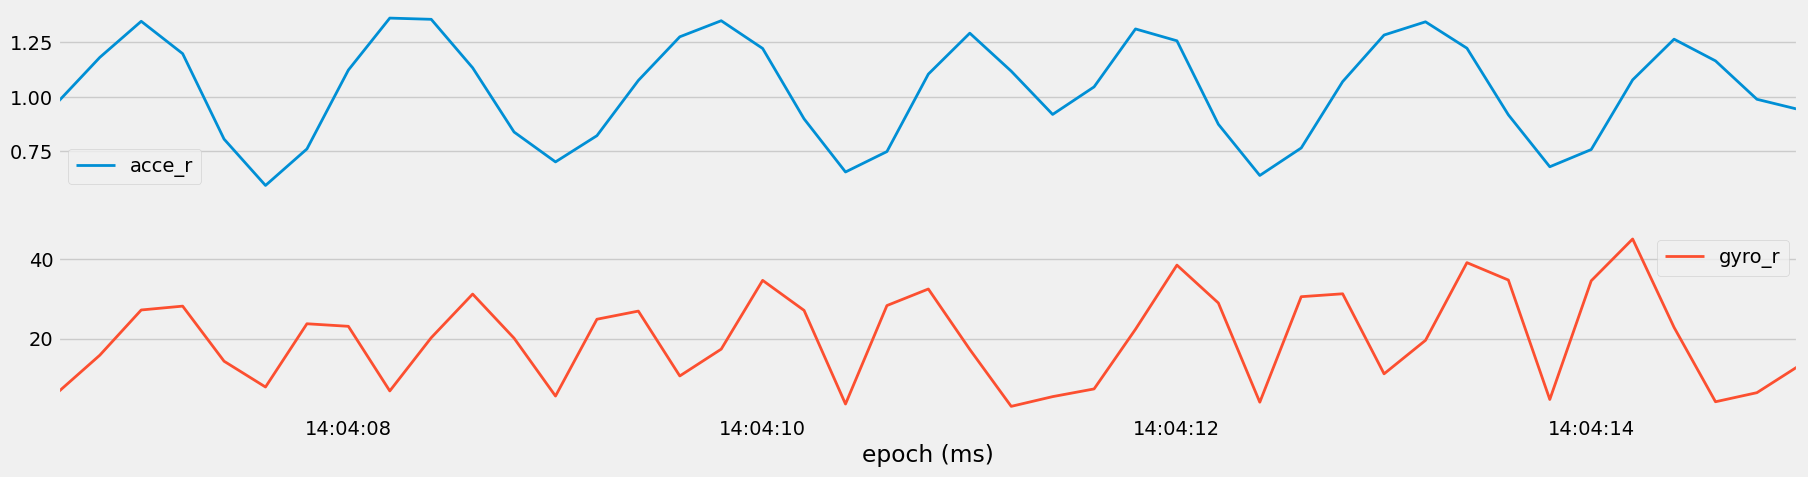

In [125]:
subset[["acce_r", "gyro_r"]].plot(subplots=True)

In [126]:
subset[["acce_r", "gyro_r"]]

acce_r     gyro_r
epoch (ms)                                  
2019-01-14 14:04:06.600  0.978453   6.631128
2019-01-14 14:04:06.800  1.180703  15.847592
2019-01-14 14:04:07.000  1.346410  27.225338
2019-01-14 14:04:07.200  1.197914  28.192232
2019-01-14 14:04:07.400  0.805621  14.337187
2019-01-14 14:04:07.600  0.593008   7.849398
2019-01-14 14:04:07.800  0.760537  23.759784
2019-01-14 14:04:08.000  1.122581  23.117214
2019-01-14 14:04:08.200  1.361112   6.862038
2019-01-14 14:04:08.400  1.355518  20.249105
2019-01-14 14:04:08.600  1.132970  31.229465
2019-01-14 14:04:08.800  0.838170  20.128408
2019-01-14 14:04:09.000  0.701072   5.575025
2019-01-14 14:04:09.200  0.821414  24.897782
2019-01-14 14:04:09.400  1.075008  26.944914
2019-01-14 14:04:09.600  1.275267  10.630132
2019-01-14 14:04:09.800  1.348986  17.376871
2019-01-14 14:04:10.000  1.221775  34.672567
2019-01-14 14:04:10.200  0.898618  27.123159
2019-01-14 14:04:10.400  0.654789   3.570491
2019-01-14 14:04:10.600  0.748527  28.339053
2019-01-14 14:04:10.800  1.104114  32.501346
2019-01-14 14:04:11.000  1.291929  17.304346
2019-01-14 14:04:11.200  1.117608   2.984897
2019-01-14 14:04:11.400  0.918926   5.431554
2019-01-14 14:04:11.600  1.045392   7.368312
2019-01-14 14:04:11.800  1.311298  22.381625
2019-01-14 14:04:12.000  1.256875  38.509409
2019-01-14 14:04:12.200  0.873855  28.984277
2019-01-14 14:04:12.400  0.638801   4.027748
2019-01-14 14:04:12.600  0.764942  30.566342
2019-01-14 14:04:12.800  1.069436  31.296457
2019-01-14 14:04:13.000  1.283336  11.170118
2019-01-14 14:04:13.200  1.344028  19.592358
2019-01-14 14:04:13.400  1.222917  39.131712
2019-01-14 14:04:13.600  0.917226  34.759426
2019-01-14 14:04:13.800  0.678750   4.718170
2019-01-14 14:04:14.000  0.757764  34.564026
2019-01-14 14:04:14.200  1.077580  45.078660
2019-01-14 14:04:14.400  1.264294  22.844465
2019-01-14 14:04:14.600  1.164765   4.142217
2019-01-14 14:04:14.800  0.988490   6.426781
2019-01-14 14:04:15.000  0.942079  13.088553

In [127]:
df_squared

acce_x    acce_y    acce_z    gyro_x    gyro_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013503  0.977003 -0.071001 -1.886218  2.438803   
2019-01-11 15:08:05.400  0.008515  0.973169 -0.066481 -0.367396  0.439794   
2019-01-11 15:08:05.600 -0.008450  0.966879 -0.071895  4.320608 -2.083978   
2019-01-11 15:08:05.800 -0.024359  0.962244 -0.084774  4.737252 -3.456339   
2019-01-11 15:08:06.000 -0.022092  0.959572 -0.096776  0.808615 -1.194575   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545  2.032956 -4.019557   
2019-01-20 17:33:27.200 -0.041403 -1.053448 -0.064530 -2.967835 -2.660315   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951 -0.043109 -2.022091   
2019-01-20 17:33:27.600 -0.050572 -1.010599 -0.060327  3.033517 -2.427441   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316  1.105070 -4.020475   

                           gyro_z participant  label category  set  duration  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200  0.937522           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.400  0.178360           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.600 -1.217263           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.800 -0.678205           B  bench    heavy   30      16.0   
2019-01-11 15:08:06.000 -1.783172           B  bench    heavy   30      16.0   
...                           ...         ...    ...      ...  ...       ...   
2019-01-20 17:33:27.000  0.196986           E    row   medium   90      19.0   
2019-01-20 17:33:27.200  1.584934           E    row   medium   90      19.0   
2019-01-20 17:33:27.400  1.155930           E    row   medium   90      19.0   
2019-01-20 17:33:27.600  0.279918           E    row   medium   90      19.0   
2019-01-20 17:33:27.800  0.974497           E    row   medium   90      19.0   

                            pca_1     pca_2     pca_3    acce_r    gyro_r  
epoch (ms)                                                                 
2019-01-11 15:08:05.200 -0.315889 -0.075461  0.072243  0.979672  3.222503  
2019-01-11 15:08:05.400 -0.314873 -0.073888  0.069825  0.975474  0.600176  
2019-01-11 15:08:05.600 -0.314236 -0.080343  0.066219  0.969585  4.948974  
2019-01-11 15:08:05.800 -0.314356 -0.090852  0.061839  0.966278  5.903203  
2019-01-11 15:08:06.000 -0.313630 -0.097479  0.062974  0.964693  2.293593  
...                           ...       ...       ...       ...       ...  
2019-01-20 17:33:27.000  0.349351 -0.148450 -0.053031  0.991076  4.508719  
2019-01-20 17:33:27.200  0.371610 -0.151455 -0.058498  1.056234  4.289212  
2019-01-20 17:33:27.400  0.368098 -0.153153 -0.058772  1.047919  2.329568  
2019-01-20 17:33:27.600  0.356453 -0.149165 -0.057320  1.013660  3.895260  
2019-01-20 17:33:27.800  0.365317 -0.148295 -0.057171  1.037636  4.281944  

[9009 rows x 16 columns]

In [129]:
# Temporal Abstraction

In [130]:
df_temporal = df_squared.copy()

In [131]:
df_temporal

acce_x    acce_y    acce_z    gyro_x    gyro_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013503  0.977003 -0.071001 -1.886218  2.438803   
2019-01-11 15:08:05.400  0.008515  0.973169 -0.066481 -0.367396  0.439794   
2019-01-11 15:08:05.600 -0.008450  0.966879 -0.071895  4.320608 -2.083978   
2019-01-11 15:08:05.800 -0.024359  0.962244 -0.084774  4.737252 -3.456339   
2019-01-11 15:08:06.000 -0.022092  0.959572 -0.096776  0.808615 -1.194575   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545  2.032956 -4.019557   
2019-01-20 17:33:27.200 -0.041403 -1.053448 -0.064530 -2.967835 -2.660315   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951 -0.043109 -2.022091   
2019-01-20 17:33:27.600 -0.050572 -1.010599 -0.060327  3.033517 -2.427441   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316  1.105070 -4.020475   

                           gyro_z participant  label category  set  duration  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200  0.937522           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.400  0.178360           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.600 -1.217263           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.800 -0.678205           B  bench    heavy   30      16.0   
2019-01-11 15:08:06.000 -1.783172           B  bench    heavy   30      16.0   
...                           ...         ...    ...      ...  ...       ...   
2019-01-20 17:33:27.000  0.196986           E    row   medium   90      19.0   
2019-01-20 17:33:27.200  1.584934           E    row   medium   90      19.0   
2019-01-20 17:33:27.400  1.155930           E    row   medium   90      19.0   
2019-01-20 17:33:27.600  0.279918           E    row   medium   90      19.0   
2019-01-20 17:33:27.800  0.974497           E    row   medium   90      19.0   

                            pca_1     pca_2     pca_3    acce_r    gyro_r  
epoch (ms)                                                                 
2019-01-11 15:08:05.200 -0.315889 -0.075461  0.072243  0.979672  3.222503  
2019-01-11 15:08:05.400 -0.314873 -0.073888  0.069825  0.975474  0.600176  
2019-01-11 15:08:05.600 -0.314236 -0.080343  0.066219  0.969585  4.948974  
2019-01-11 15:08:05.800 -0.314356 -0.090852  0.061839  0.966278  5.903203  
2019-01-11 15:08:06.000 -0.313630 -0.097479  0.062974  0.964693  2.293593  
...                           ...       ...       ...       ...       ...  
2019-01-20 17:33:27.000  0.349351 -0.148450 -0.053031  0.991076  4.508719  
2019-01-20 17:33:27.200  0.371610 -0.151455 -0.058498  1.056234  4.289212  
2019-01-20 17:33:27.400  0.368098 -0.153153 -0.058772  1.047919  2.329568  
2019-01-20 17:33:27.600  0.356453 -0.149165 -0.057320  1.013660  3.895260  
2019-01-20 17:33:27.800  0.365317 -0.148295 -0.057171  1.037636  4.281944  

[9009 rows x 16 columns]

In [132]:
predictor_columns + ["acce_r", "gyro_r"]

['acce_x',
 'acce_y',
 'acce_z',
 'gyro_x',
 'gyro_y',
 'gyro_z',
 'acce_r',
 'gyro_r']

In [133]:
predictor_columns = predictor_columns + ["acce_r", "gyro_r"]

In [134]:
predictor_columns

['acce_x',
 'acce_y',
 'acce_z',
 'gyro_x',
 'gyro_y',
 'gyro_z',
 'acce_r',
 'gyro_r']

In [135]:
# Adding the squared columns to the predictor_columns

In [136]:
window_size = int(1000 / 200)

In [137]:
window_size

5

In [138]:
df_temporal

acce_x    acce_y    acce_z    gyro_x    gyro_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013503  0.977003 -0.071001 -1.886218  2.438803   
2019-01-11 15:08:05.400  0.008515  0.973169 -0.066481 -0.367396  0.439794   
2019-01-11 15:08:05.600 -0.008450  0.966879 -0.071895  4.320608 -2.083978   
2019-01-11 15:08:05.800 -0.024359  0.962244 -0.084774  4.737252 -3.456339   
2019-01-11 15:08:06.000 -0.022092  0.959572 -0.096776  0.808615 -1.194575   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545  2.032956 -4.019557   
2019-01-20 17:33:27.200 -0.041403 -1.053448 -0.064530 -2.967835 -2.660315   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951 -0.043109 -2.022091   
2019-01-20 17:33:27.600 -0.050572 -1.010599 -0.060327  3.033517 -2.427441   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316  1.105070 -4.020475   

                           gyro_z participant  label category  set  duration  \
epoch (ms)                                                                     
2019-01-11 15:08:05.200  0.937522           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.400  0.178360           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.600 -1.217263           B  bench    heavy   30      16.0   
2019-01-11 15:08:05.800 -0.678205           B  bench    heavy   30      16.0   
2019-01-11 15:08:06.000 -1.783172           B  bench    heavy   30      16.0   
...                           ...         ...    ...      ...  ...       ...   
2019-01-20 17:33:27.000  0.196986           E    row   medium   90      19.0   
2019-01-20 17:33:27.200  1.584934           E    row   medium   90      19.0   
2019-01-20 17:33:27.400  1.155930           E    row   medium   90      19.0   
2019-01-20 17:33:27.600  0.279918           E    row   medium   90      19.0   
2019-01-20 17:33:27.800  0.974497           E    row   medium   90      19.0   

                            pca_1     pca_2     pca_3    acce_r    gyro_r  
epoch (ms)                                                                 
2019-01-11 15:08:05.200 -0.315889 -0.075461  0.072243  0.979672  3.222503  
2019-01-11 15:08:05.400 -0.314873 -0.073888  0.069825  0.975474  0.600176  
2019-01-11 15:08:05.600 -0.314236 -0.080343  0.066219  0.969585  4.948974  
2019-01-11 15:08:05.800 -0.314356 -0.090852  0.061839  0.966278  5.903203  
2019-01-11 15:08:06.000 -0.313630 -0.097479  0.062974  0.964693  2.293593  
...                           ...       ...       ...       ...       ...  
2019-01-20 17:33:27.000  0.349351 -0.148450 -0.053031  0.991076  4.508719  
2019-01-20 17:33:27.200  0.371610 -0.151455 -0.058498  1.056234  4.289212  
2019-01-20 17:33:27.400  0.368098 -0.153153 -0.058772  1.047919  2.329568  
2019-01-20 17:33:27.600  0.356453 -0.149165 -0.057320  1.013660  3.895260  
2019-01-20 17:33:27.800  0.365317 -0.148295 -0.057171  1.037636  4.281944  

[9009 rows x 16 columns]

In [141]:
# We'll start by using a window size (size_window) of 5 since it matches the interval of our data (epoch) which is 200ms --> 5 readings every second.

In [142]:
NumAbs = NumericalAbstraction()

In [146]:
# renamed the window_size to size_window so that I won't be confused to the existing method that is window_size=

size_window = int(1000 / 200)

In [147]:
for per_col in predictor_columns:
    df_temporal = NumAbs.abstract_numerical(df_temporal, [per_col], size_window, "mean")
    df_temporal = NumAbs.abstract_numerical(df_temporal, [per_col], size_window, "std")

In [148]:
# looking at the df to see what the temporal function does to the df.T

df_temporal

acce_x    acce_y    acce_z    gyro_x    gyro_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013503  0.977003 -0.071001 -1.886218  2.438803   
2019-01-11 15:08:05.400  0.008515  0.973169 -0.066481 -0.367396  0.439794   
2019-01-11 15:08:05.600 -0.008450  0.966879 -0.071895  4.320608 -2.083978   
2019-01-11 15:08:05.800 -0.024359  0.962244 -0.084774  4.737252 -3.456339   
2019-01-11 15:08:06.000 -0.022092  0.959572 -0.096776  0.808615 -1.194575   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545  2.032956 -4.019557   
2019-01-20 17:33:27.200 -0.041403 -1.053448 -0.064530 -2.967835 -2.660315   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951 -0.043109 -2.022091   
2019-01-20 17:33:27.600 -0.050572 -1.010599 -0.060327  3.033517 -2.427441   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316  1.105070 -4.020475   

                           gyro_z participant  label category  set  ...  \
epoch (ms)                                                          ...   
2019-01-11 15:08:05.200  0.937522           B  bench    heavy   30  ...   
2019-01-11 15:08:05.400  0.178360           B  bench    heavy   30  ...   
2019-01-11 15:08:05.600 -1.217263           B  bench    heavy   30  ...   
2019-01-11 15:08:05.800 -0.678205           B  bench    heavy   30  ...   
2019-01-11 15:08:06.000 -1.783172           B  bench    heavy   30  ...   
...                           ...         ...    ...      ...  ...  ...   
2019-01-20 17:33:27.000  0.196986           E    row   medium   90  ...   
2019-01-20 17:33:27.200  1.584934           E    row   medium   90  ...   
2019-01-20 17:33:27.400  1.155930           E    row   medium   90  ...   
2019-01-20 17:33:27.600  0.279918           E    row   medium   90  ...   
2019-01-20 17:33:27.800  0.974497           E    row   medium   90  ...   

                         gyro_x_temp_mean_ws_5  gyro_x_temp_std_ws_5  \
epoch (ms)                                                             
2019-01-11 15:08:05.200                    NaN                   NaN   
2019-01-11 15:08:05.400                    NaN                   NaN   
2019-01-11 15:08:05.600                    NaN                   NaN   
2019-01-11 15:08:05.800                    NaN                   NaN   
2019-01-11 15:08:06.000               1.522572              2.602489   
...                                        ...                   ...   
2019-01-20 17:33:27.000             -11.989659             18.259425   
2019-01-20 17:33:27.200              -4.824823             12.436925   
2019-01-20 17:33:27.400               0.842782              4.018501   
2019-01-20 17:33:27.600               2.006143              3.622861   
2019-01-20 17:33:27.800               0.632120              2.067285   

                         gyro_y_temp_mean_ws_5  gyro_y_temp_std_ws_5  \
epoch (ms)                                                             
2019-01-11 15:08:05.200                    NaN                   NaN   
2019-01-11 15:08:05.400                    NaN                   NaN   
2019-01-11 15:08:05.600                    NaN                   NaN   
2019-01-11 15:08:05.800                    NaN                   NaN   
2019-01-11 15:08:06.000              -0.771259              2.043684   
...                                        ...                   ...   
2019-01-20 17:33:27.000               0.708827              5.430793   
2019-01-20 17:33:27.200              -1.585429              3.656665   
2019-01-20 17:33:27.400              -3.071749              1.189271   
2019-01-20 17:33:27.600              -3.200450              1.071976   
2019-01-20 17:33:27.800              -3.029976              0.833773   

                         gyro_z_temp_mean_ws_5  gyro_z_temp_std_ws_5  \
epoch (ms)                                                             
2019-01-11 15:08:05.200        

In [149]:
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acce_x                 9009 non-null   float64
 1   acce_y                 9009 non-null   float64
 2   acce_z                 9009 non-null   float64
 3   gyro_x                 9009 non-null   float64
 4   gyro_y                 9009 non-null   float64
 5   gyro_z                 9009 non-null   float64
 6   participant            9009 non-null   object 
 7   label                  9009 non-null   object 
 8   category               9009 non-null   object 
 9   set                    9009 non-null   int32  
 10  duration               9009 non-null   float64
 11  pca_1                  9009 non-null   float64
 12  pca_2                  9009 non-null   float64
 13  pca_3                  9009 non-null   float64
 14  acce_r

In [150]:
# The 4 NaN values at the start of the temporal mean and std is because of the window size of 5. At the first 4 data, there's no data before that. And at the 5th, the temporal function was able to do the mean and stf since its enough data for the window size that we set... which is 5.

In [154]:
# Just resetting the df_temporal.

In [155]:
df_temporal = df_squared.copy()

In [156]:
NumAbs = NumericalAbstraction()

In [157]:
predictor_columns = predictor_columns + ["acce_r", "gyro_r"]

    # Like the cutoff variable, this is a trial and error.
size_window = int(1000 / 200)

In [158]:
for per_col in predictor_columns:
    df_temporal = NumAbs.abstract_numerical(df_temporal, [per_col], size_window, "mean")
    df_temporal = NumAbs.abstract_numerical(df_temporal, [per_col], size_window, "std")

In [159]:
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acce_x                 9009 non-null   float64
 1   acce_y                 9009 non-null   float64
 2   acce_z                 9009 non-null   float64
 3   gyro_x                 9009 non-null   float64
 4   gyro_y                 9009 non-null   float64
 5   gyro_z                 9009 non-null   float64
 6   participant            9009 non-null   object 
 7   label                  9009 non-null   object 
 8   category               9009 non-null   object 
 9   set                    9009 non-null   int32  
 10  duration               9009 non-null   float64
 11  pca_1                  9009 non-null   float64
 12  pca_2                  9009 non-null   float64
 13  pca_3                  9009 non-null   float64
 14  acce_r

In [160]:
# Deleting the "duration" column since it's done its job for the Butterworth Lowpass Filter.

del df_temporal["duration"]

df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acce_x                 9009 non-null   float64
 1   acce_y                 9009 non-null   float64
 2   acce_z                 9009 non-null   float64
 3   gyro_x                 9009 non-null   float64
 4   gyro_y                 9009 non-null   float64
 5   gyro_z                 9009 non-null   float64
 6   participant            9009 non-null   object 
 7   label                  9009 non-null   object 
 8   category               9009 non-null   object 
 9   set                    9009 non-null   int32  
 10  pca_1                  9009 non-null   float64
 11  pca_2                  9009 non-null   float64
 12  pca_3                  9009 non-null   float64
 13  acce_r                 9009 non-null   float64
 14  gyro_r

In [161]:
df_temporal["set"].unique()

array([30,  1, 31,  3,  9, 32, 10, 33, 11, 34, 35, 15, 36, 16, 37, 17, 27,
       38, 28, 29,  6, 65, 67, 73,  4,  2, 39, 40, 12, 41, 13, 45, 14, 46,
       51, 22, 47, 23, 49, 68, 66, 76, 77, 78, 52, 83, 48, 85, 50, 24, 53,
       25, 54, 26, 55,  7, 42,  8, 43,  5, 44, 84, 86, 92, 93, 74, 75, 72,
       63, 64, 62, 56, 57, 18, 58, 20, 59, 60, 61, 69, 70, 19, 71, 21, 87,
       89, 91, 80, 82, 88, 90])

In [162]:
def_temporal_list = []

In [163]:
for per_set in df_temporal["set"].unique():
    # .copy() to avoid any warnings or error.
    subset = df_temporal[df_temporal["set"] == per_set].copy()
    for per_col in predictor_columns:
        subset = NumAbs.abstract_numerical(subset, [per_col], size_window, "mean")
        subset = NumAbs.abstract_numerical(subset, [per_col], size_window, "std")
        
    def_temporal_list.append(subset)

In [164]:
pd.concat(def_temporal_list)

acce_x    acce_y    acce_z    gyro_x    gyro_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013503  0.977003 -0.071001 -1.886218  2.438803   
2019-01-11 15:08:05.400  0.008515  0.973169 -0.066481 -0.367396  0.439794   
2019-01-11 15:08:05.600 -0.008450  0.966879 -0.071895  4.320608 -2.083978   
2019-01-11 15:08:05.800 -0.024359  0.962244 -0.084774  4.737252 -3.456339   
2019-01-11 15:08:06.000 -0.022092  0.959572 -0.096776  0.808615 -1.194575   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545  2.032956 -4.019557   
2019-01-20 17:33:27.200 -0.041403 -1.053448 -0.064530 -2.967835 -2.660315   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951 -0.043109 -2.022091   
2019-01-20 17:33:27.600 -0.050572 -1.010599 -0.060327  3.033517 -2.427441   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316  1.105070 -4.020475   

                           gyro_z participant  label category  set  ...  \
epoch (ms)                                                          ...   
2019-01-11 15:08:05.200  0.937522           B  bench    heavy   30  ...   
2019-01-11 15:08:05.400  0.178360           B  bench    heavy   30  ...   
2019-01-11 15:08:05.600 -1.217263           B  bench    heavy   30  ...   
2019-01-11 15:08:05.800 -0.678205           B  bench    heavy   30  ...   
2019-01-11 15:08:06.000 -1.783172           B  bench    heavy   30  ...   
...                           ...         ...    ...      ...  ...  ...   
2019-01-20 17:33:27.000  0.196986           E    row   medium   90  ...   
2019-01-20 17:33:27.200  1.584934           E    row   medium   90  ...   
2019-01-20 17:33:27.400  1.155930           E    row   medium   90  ...   
2019-01-20 17:33:27.600  0.279918           E    row   medium   90  ...   
2019-01-20 17:33:27.800  0.974497           E    row   medium   90  ...   

                         gyro_x_temp_mean_ws_5  gyro_x_temp_std_ws_5  \
epoch (ms)                                                             
2019-01-11 15:08:05.200                    NaN                   NaN   
2019-01-11 15:08:05.400                    NaN                   NaN   
2019-01-11 15:08:05.600                    NaN                   NaN   
2019-01-11 15:08:05.800                    NaN                   NaN   
2019-01-11 15:08:06.000               1.522572              2.602489   
...                                        ...                   ...   
2019-01-20 17:33:27.000             -11.989659             18.259425   
2019-01-20 17:33:27.200              -4.824823             12.436925   
2019-01-20 17:33:27.400               0.842782              4.018501   
2019-01-20 17:33:27.600               2.006143              3.622861   
2019-01-20 17:33:27.800               0.632120              2.067285   

                         gyro_y_temp_mean_ws_5  gyro_y_temp_std_ws_5  \
epoch (ms)                                                             
2019-01-11 15:08:05.200                    NaN                   NaN   
2019-01-11 15:08:05.400                    NaN                   NaN   
2019-01-11 15:08:05.600                    NaN                   NaN   
2019-01-11 15:08:05.800                    NaN                   NaN   
2019-01-11 15:08:06.000              -0.771259              2.043684   
...                                        ...                   ...   
2019-01-20 17:33:27.000               0.708827              5.430793   
2019-01-20 17:33:27.200              -1.585429              3.656665   
2019-01-20 17:33:27.400              -3.071749              1.189271   
2019-01-20 17:33:27.600              -3.200450              1.071976   
2019-01-20 17:33:27.800              -3.029976              0.833773   

                         gyro_z_temp_mean_ws_5  gyro_z_temp_std_ws_5  \
epoch (ms)                                                             
2019-01-11 15:08:05.200        

In [165]:
df_temporal = pd.concat(def_temporal_list)

In [166]:
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acce_x                 9009 non-null   float64
 1   acce_y                 9009 non-null   float64
 2   acce_z                 9009 non-null   float64
 3   gyro_x                 9009 non-null   float64
 4   gyro_y                 9009 non-null   float64
 5   gyro_z                 9009 non-null   float64
 6   participant            9009 non-null   object 
 7   label                  9009 non-null   object 
 8   category               9009 non-null   object 
 9   set                    9009 non-null   int32  
 10  pca_1                  9009 non-null   float64
 11  pca_2                  9009 non-null   float64
 12  pca_3                  9009 non-null   float64
 13  acce_r                 9009 non-null   float64
 14  gyro_r

In [167]:
# What just happened is we make the data as accurate as possible. Because at the first use of the "abstract_numerical", the data it combines overlaps to the other label, set. And we don't want that. Example, last value of ohp combines to the first value of medium, something like that. 

# This time, what we did for it to not combine to other label is to use a subset inside a for loop that loops to the set, then another for loop inside the loop that will loop through the columns and calculates the mean and std using the "abstract_numercal". This way, the data won't be colliding or combining to the other set, label since the outer loop is filtered to each set. This results in more "NaN" values to the temporal mean and std columns.

<AxesSubplot: xlabel='epoch (ms)'>

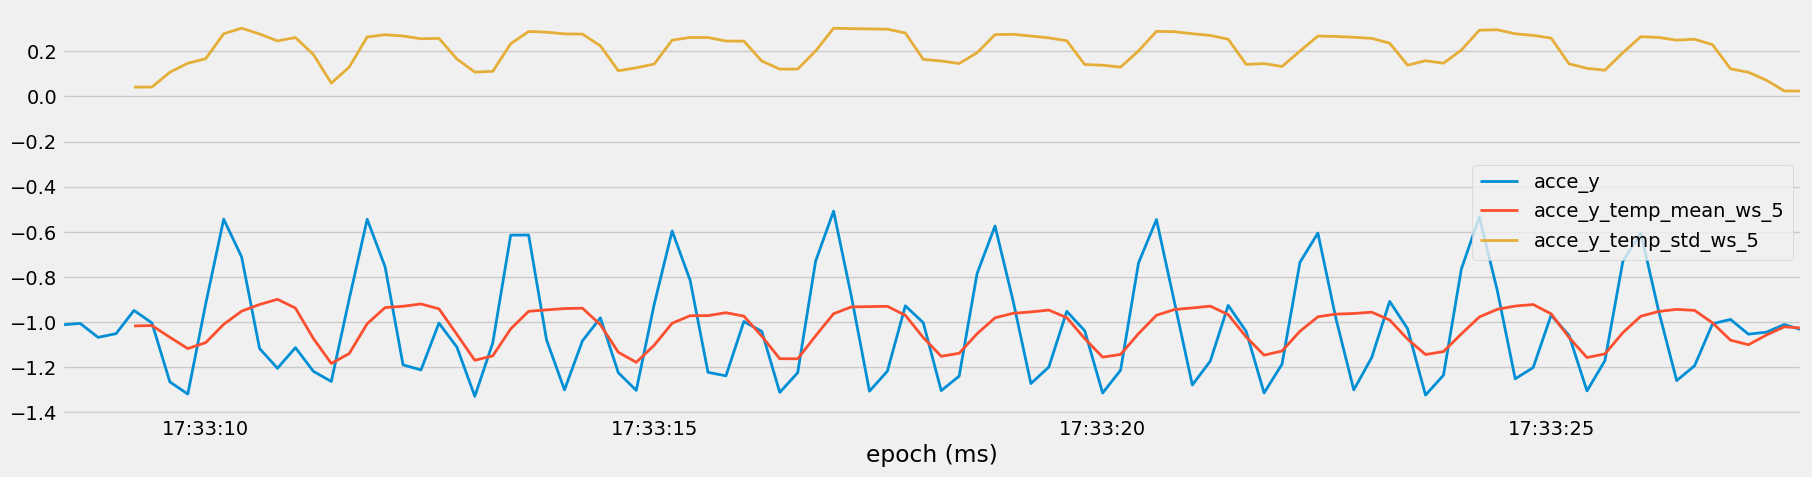

In [170]:
#plotting a subset and plotting the selected columns - original, temporal mean, temporal std.

subset[["acce_y", "acce_y_temp_mean_ws_5", "acce_y_temp_std_ws_5"]].plot()

In [171]:
# With this, we can see that the std and the mean is a smooth version of the original.

<AxesSubplot: xlabel='epoch (ms)'>

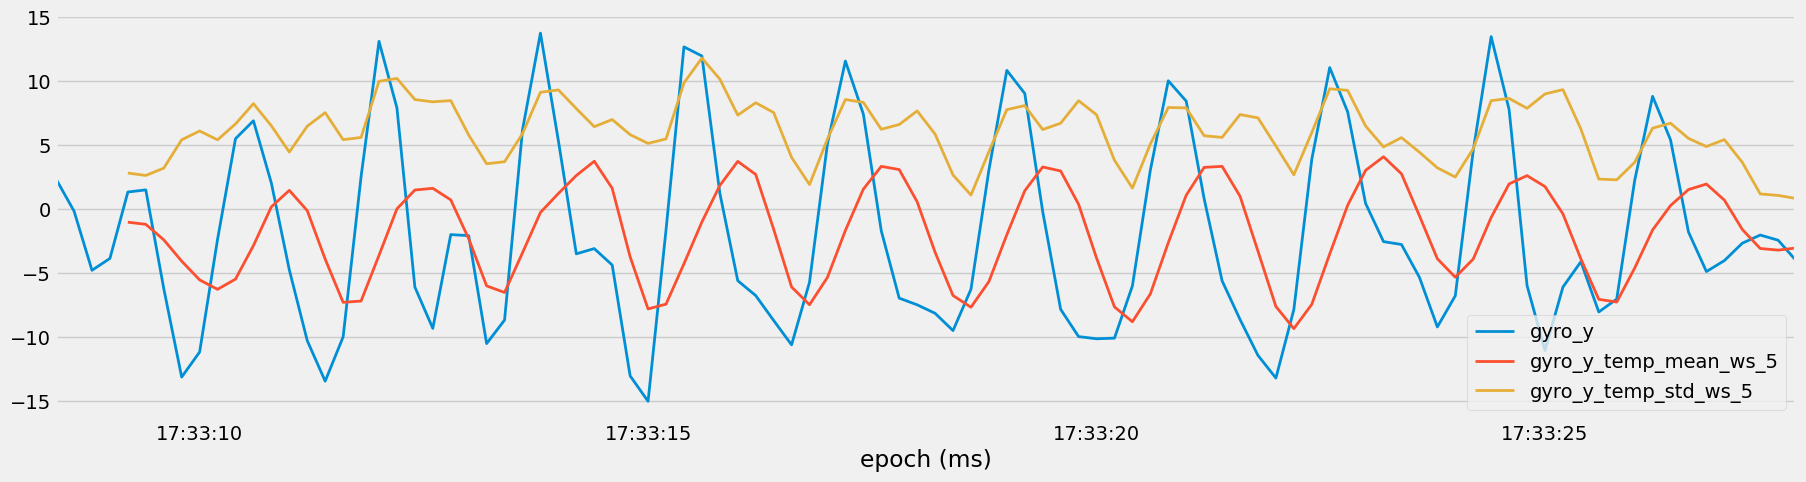

In [172]:
# For the gyroscrope data:

subset[["gyro_y", "gyro_y_temp_mean_ws_5", "gyro_y_temp_std_ws_5"]].plot()

In [173]:
# Frequency features --> Discrete Fourier Transformation

In [191]:
# resetting the index since the frequency abstraction requires the index to be numerical.

df_freq = df_temporal.copy().reset_index()

In [193]:
FreqAbs = FourierTransformation()

    # defining the variable for frequency size and window size
frequency_size = int(1000 / 200) # ms --> 5 readings per seconds
size_window = int(2800 / 200)

In [194]:
df_freq = FreqAbs.abstract_frequency(df_freq, ["acce_y"], size_window, frequency_size)

In [196]:
# looking at the columns

df_freq.columns

Index(['epoch (ms)', 'acce_x', 'acce_y', 'acce_z', 'gyro_x', 'gyro_y',
       'gyro_z', 'participant', 'label', 'category', 'set', 'pca_1', 'pca_2',
       'pca_3', 'acce_r', 'gyro_r', 'acce_x_temp_mean_ws_5',
       'acce_x_temp_std_ws_5', 'acce_y_temp_mean_ws_5', 'acce_y_temp_std_ws_5',
       'acce_z_temp_mean_ws_5', 'acce_z_temp_std_ws_5',
       'gyro_x_temp_mean_ws_5', 'gyro_x_temp_std_ws_5',
       'gyro_y_temp_mean_ws_5', 'gyro_y_temp_std_ws_5',
       'gyro_z_temp_mean_ws_5', 'gyro_z_temp_std_ws_5',
       'acce_r_temp_mean_ws_5', 'acce_r_temp_std_ws_5',
       'gyro_r_temp_mean_ws_5', 'gyro_r_temp_std_ws_5', 'acce_y_max_freq',
       'acce_y_freq_weighted', 'acce_y_pse', 'acce_y_freq_0.0_Hz_ws_14',
       'acce_y_freq_0.357_Hz_ws_14', 'acce_y_freq_0.714_Hz_ws_14',
       'acce_y_freq_1.071_Hz_ws_14', 'acce_y_freq_1.429_Hz_ws_14',
       'acce_y_freq_1.786_Hz_ws_14', 'acce_y_freq_2.143_Hz_ws_14',
       'acce_y_freq_2.5_Hz_ws_14'],
      dtype='object')

In [204]:
# Using subset to visualize the result

In [205]:
subset = df_freq[df_freq["set"] == 51]

<AxesSubplot: >

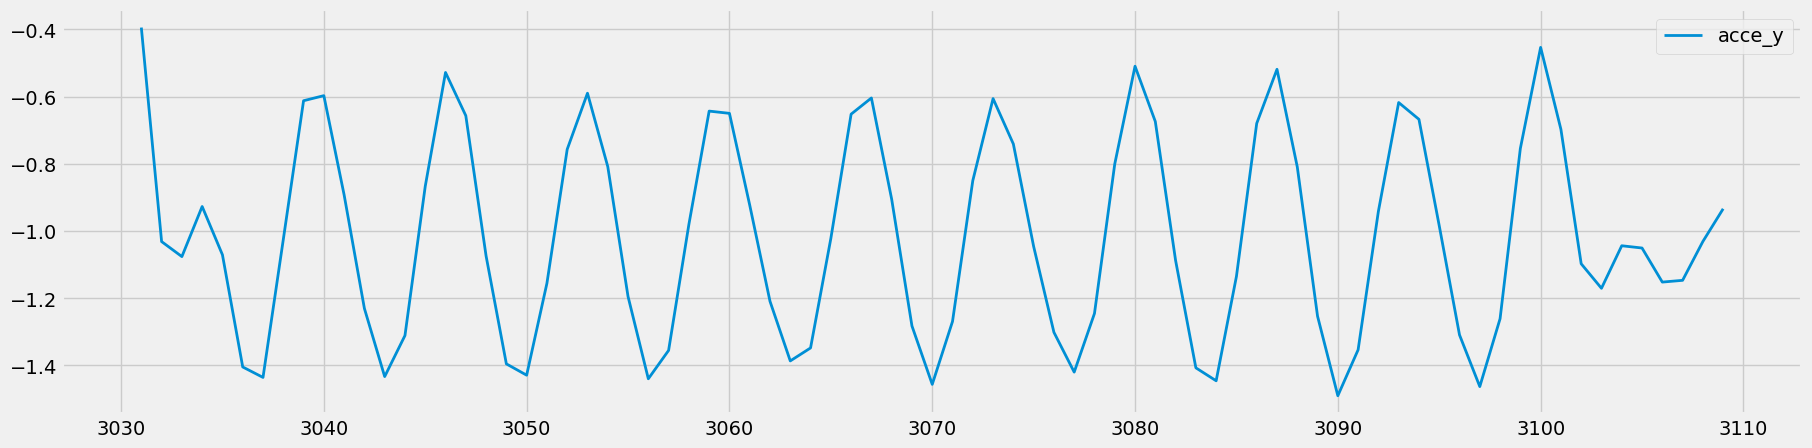

In [207]:
subset[["acce_y"]].plot()

<AxesSubplot: >

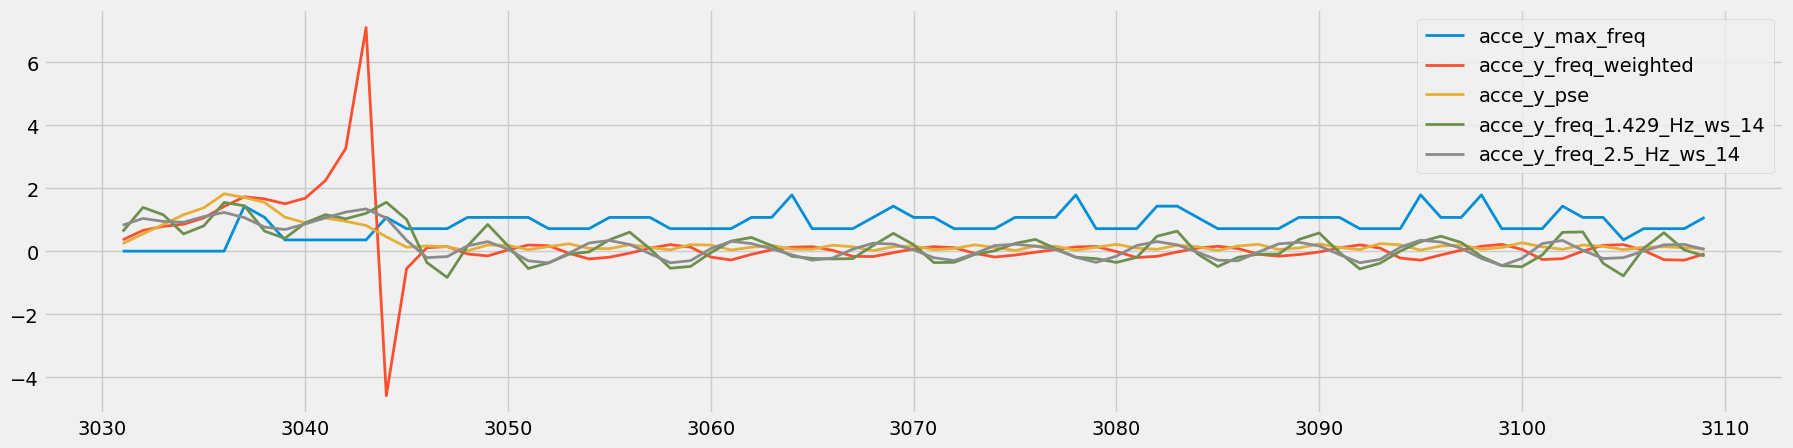

In [208]:
subset[
    [
        "acce_y_max_freq",
        "acce_y_freq_weighted",
        "acce_y_pse",
        "acce_y_freq_1.429_Hz_ws_14",
        "acce_y_freq_2.5_Hz_ws_14",
    ]
].plot()

In [210]:
# Now looping through all of the columns

In [211]:
df_freq_list = []

In [212]:
for per_set in df_freq["set"].unique():
    print(f"Applying fourier transformation to set {per_set}")
    # .copy() to avoid any warnings or error.
    subset = df_freq[df_freq["set"] == per_set].reset_index(drop=True).copy()
    subset = FreqAbs.abstract_frequency(subset, predictor_columns, size_window, frequency_size)
    df_freq_list.append(subset)

Applying fourier transformation to set 30
Applying fourier transformation to set 1
Applying fourier transformation to set 31
Applying fourier transformation to set 3
Applying fourier transformation to set 9
Applying fourier transformation to set 32
Applying fourier transformation to set 10
Applying fourier transformation to set 33
Applying fourier transformation to set 11
Applying fourier transformation to set 34
Applying fourier transformation to set 35
Applying fourier transformation to set 15
Applying fourier transformation to set 36
Applying fourier transformation to set 16
Applying fourier transformation to set 37
Applying fourier transformation to set 17
Applying fourier transformation to set 27
Applying fourier transformation to set 38
Applying fourier transformation to set 28
Applying fourier transformation to set 29
Applying fourier transformation to set 6
Applying fourier transformation to set 65
Applying fourier transformation to set 67
Applying fourier transformation to set

In [214]:
df_freq = pd.concat(df_freq_list)

In [215]:
df_freq

epoch (ms)    acce_x    acce_y    acce_z    gyro_x    gyro_y  \
0  2019-01-11 15:08:05.200  0.013503  0.977003 -0.071001 -1.886218  2.438803   
1  2019-01-11 15:08:05.400  0.008515  0.973169 -0.066481 -0.367396  0.439794   
2  2019-01-11 15:08:05.600 -0.008450  0.966879 -0.071895  4.320608 -2.083978   
3  2019-01-11 15:08:05.800 -0.024359  0.962244 -0.084774  4.737252 -3.456339   
4  2019-01-11 15:08:06.000 -0.022092  0.959572 -0.096776  0.808615 -1.194575   
..                     ...       ...       ...       ...       ...       ...   
93 2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545  2.032956 -4.019557   
94 2019-01-20 17:33:27.200 -0.041403 -1.053448 -0.064530 -2.967835 -2.660315   
95 2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951 -0.043109 -2.022091   
96 2019-01-20 17:33:27.600 -0.050572 -1.010599 -0.060327  3.033517 -2.427441   
97 2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316  1.105070 -4.020475   

      gyro_z participant  label category  ...  gyro_r_freq_weighted  \
0   0.937522           B  bench    heavy  ...                   NaN   
1   0.178360           B  bench    heavy  ...                   NaN   
2  -1.217263           B  bench    heavy  ...                   NaN   
3  -0.678205           B  bench    heavy  ...                   NaN   
4  -1.783172           B  bench    heavy  ...                   NaN   
..       ...         ...    ...      ...  ...                   ...   
93  0.196986           E    row   medium  ...             -0.255402   
94  1.584934           E    row   medium  ...              0.536997   
95  1.155930           E    row   medium  ...              0.633179   
96  0.279918           E    row   medium  ...              0.011089   
97  0.974497           E    row   medium  ...              0.140562   

    gyro_r_pse  gyro_r_freq_0.0_Hz_ws_14  gyro_r_freq_0.357_Hz_ws_14  \
0          NaN                       NaN                         NaN   
1          NaN                       NaN                         NaN   
2          NaN                       NaN                         NaN   
3          NaN                       NaN                         NaN   
4          NaN                       NaN                         NaN   
..         ...                       ...                         ...   
93    0.238607                319.521621                  -34.907878   
94    0.660463                308.391215                  -44.886326   
95    0.577277                267.731227                  -73.117861   
96    0.612936                240.957375                  -72.505797   
97    0.333870                235.498209                  -37.570166   

    gyro_r_freq_0.714_Hz_ws_14  gyro_r_freq_1.071_Hz_ws_14  \
0                          NaN                         NaN   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          NaN                         NaN   
4                          NaN                         NaN   
..                         ...                         ...   
93                   31.861740                    9.784884   
94                   66.358365                   78.568468   
95                   40.866650                   37.338879   
96                   11.076672                  -23.105359   
97                   -2.922213                  -26.531899   

    gyro_r_freq_1.429_Hz_ws_14  gyro_r_freq_1.786_Hz_ws_14  \
0                          NaN                         NaN   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          NaN                         NaN   
4                          NaN                         NaN   
..                         ...                         ...   
93                    1.149502                  -51.406834   
94                  -20.114545                   64.769560   
95                   18.436116    

In [216]:
# Setting the index back to the epoch:

df_freq = pd.concat(df_freq_list).set_index("epoch (ms)", drop=True)

In [217]:
df_freq

acce_x    acce_y    acce_z    gyro_x    gyro_y  \
epoch (ms)                                                                  
2019-01-11 15:08:05.200  0.013503  0.977003 -0.071001 -1.886218  2.438803   
2019-01-11 15:08:05.400  0.008515  0.973169 -0.066481 -0.367396  0.439794   
2019-01-11 15:08:05.600 -0.008450  0.966879 -0.071895  4.320608 -2.083978   
2019-01-11 15:08:05.800 -0.024359  0.962244 -0.084774  4.737252 -3.456339   
2019-01-11 15:08:06.000 -0.022092  0.959572 -0.096776  0.808615 -1.194575   
...                           ...       ...       ...       ...       ...   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545  2.032956 -4.019557   
2019-01-20 17:33:27.200 -0.041403 -1.053448 -0.064530 -2.967835 -2.660315   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951 -0.043109 -2.022091   
2019-01-20 17:33:27.600 -0.050572 -1.010599 -0.060327  3.033517 -2.427441   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316  1.105070 -4.020475   

                           gyro_z participant  label category  set  ...  \
epoch (ms)                                                          ...   
2019-01-11 15:08:05.200  0.937522           B  bench    heavy   30  ...   
2019-01-11 15:08:05.400  0.178360           B  bench    heavy   30  ...   
2019-01-11 15:08:05.600 -1.217263           B  bench    heavy   30  ...   
2019-01-11 15:08:05.800 -0.678205           B  bench    heavy   30  ...   
2019-01-11 15:08:06.000 -1.783172           B  bench    heavy   30  ...   
...                           ...         ...    ...      ...  ...  ...   
2019-01-20 17:33:27.000  0.196986           E    row   medium   90  ...   
2019-01-20 17:33:27.200  1.584934           E    row   medium   90  ...   
2019-01-20 17:33:27.400  1.155930           E    row   medium   90  ...   
2019-01-20 17:33:27.600  0.279918           E    row   medium   90  ...   
2019-01-20 17:33:27.800  0.974497           E    row   medium   90  ...   

                         gyro_r_freq_weighted  gyro_r_pse  \
epoch (ms)                                                  
2019-01-11 15:08:05.200                   NaN         NaN   
2019-01-11 15:08:05.400                   NaN         NaN   
2019-01-11 15:08:05.600                   NaN         NaN   
2019-01-11 15:08:05.800                   NaN         NaN   
2019-01-11 15:08:06.000                   NaN         NaN   
...                                       ...         ...   
2019-01-20 17:33:27.000             -0.255402    0.238607   
2019-01-20 17:33:27.200              0.536997    0.660463   
2019-01-20 17:33:27.400              0.633179    0.577277   
2019-01-20 17:33:27.600              0.011089    0.612936   
2019-01-20 17:33:27.800              0.140562    0.333870   

                         gyro_r_freq_0.0_Hz_ws_14  gyro_r_freq_0.357_Hz_ws_14  \
epoch (ms)                                                                      
2019-01-11 15:08:05.200                       NaN                         NaN   
2019-01-11 15:08:05.400                       NaN                         NaN   
2019-01-11 15:08:05.600                       NaN                         NaN   
2019-01-11 15:08:05.800                       NaN                         NaN   
2019-01-11 15:08:06.000                       NaN                         NaN   
...                                           ...                         ...   
2019-01-20 17:33:27.000                319.521621                  -34.907878   
2019-01-20 17:33:27.200                308.391215                  -44.886326   
2019-01-20 17:33:27.400                267.731227                  -73.117861   
2019-01-20 17:33:27.600                240.957375                  -72.505797   
2019-01-20 17:33:27.800                235.498209                  -37.570166   

                         gyro_r_freq_0.714_Hz_ws_14  \
epoch (ms)                                            
2019-01-11 15:08:05.200                         NaN   
2019-01-11 15:08:05.400             

In [219]:
# Dealing with overlapping windows

In [220]:
# Dropping all of the NaN:

In [221]:
df_freq = df_freq.dropna()

In [222]:
df_freq

acce_x    acce_y    acce_z     gyro_x     gyro_y  \
epoch (ms)                                                                    
2019-01-11 15:08:08.000 -0.172350  0.909033 -0.168556 -27.895242 -10.831760   
2019-01-11 15:08:08.200 -0.075541  0.854894 -0.094507 -17.787623  -7.152388   
2019-01-11 15:08:08.400 -0.024777  0.860474 -0.059254  -2.040040  -1.316930   
2019-01-11 15:08:08.600 -0.039468  0.947898 -0.047164   1.731909  -0.126808   
2019-01-11 15:08:08.800 -0.063378  0.997048 -0.033869   1.164754  -1.844231   
...                           ...       ...       ...        ...        ...   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545   2.032956  -4.019557   
2019-01-20 17:33:27.200 -0.041403 -1.053448 -0.064530  -2.967835  -2.660315   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951  -0.043109  -2.022091   
2019-01-20 17:33:27.600 -0.050572 -1.010599 -0.060327   3.033517  -2.427441   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316   1.105070  -4.020475   

                            gyro_z participant  label category  set  ...  \
epoch (ms)                                                           ...   
2019-01-11 15:08:08.000  26.285743           B  bench    heavy   30  ...   
2019-01-11 15:08:08.200  16.679304           B  bench    heavy   30  ...   
2019-01-11 15:08:08.400   1.986210           B  bench    heavy   30  ...   
2019-01-11 15:08:08.600  -3.356740           B  bench    heavy   30  ...   
2019-01-11 15:08:08.800  -1.240332           B  bench    heavy   30  ...   
...                            ...         ...    ...      ...  ...  ...   
2019-01-20 17:33:27.000   0.196986           E    row   medium   90  ...   
2019-01-20 17:33:27.200   1.584934           E    row   medium   90  ...   
2019-01-20 17:33:27.400   1.155930           E    row   medium   90  ...   
2019-01-20 17:33:27.600   0.279918           E    row   medium   90  ...   
2019-01-20 17:33:27.800   0.974497           E    row   medium   90  ...   

                         gyro_r_freq_weighted  gyro_r_pse  \
epoch (ms)                                                  
2019-01-11 15:08:08.000             -1.099263    0.404506   
2019-01-11 15:08:08.200             -1.091920    0.379916   
2019-01-11 15:08:08.400             -0.182028    0.376805   
2019-01-11 15:08:08.600             -0.051046    0.608396   
2019-01-11 15:08:08.800             -0.547866    0.508919   
...                                       ...         ...   
2019-01-20 17:33:27.000             -0.255402    0.238607   
2019-01-20 17:33:27.200              0.536997    0.660463   
2019-01-20 17:33:27.400              0.633179    0.577277   
2019-01-20 17:33:27.600              0.011089    0.612936   
2019-01-20 17:33:27.800              0.140562    0.333870   

                         gyro_r_freq_0.0_Hz_ws_14  gyro_r_freq_0.357_Hz_ws_14  \
epoch (ms)                                                                      
2019-01-11 15:08:08.000                241.915837                  -32.414519   
2019-01-11 15:08:08.200                264.105051                  -31.509559   
2019-01-11 15:08:08.400                266.641927                  -45.027971   
2019-01-11 15:08:08.600                265.472278                  -54.366043   
2019-01-11 15:08:08.800                262.078311                  -56.234625   
...                                           ...                         ...   
2019-01-20 17:33:27.000                319.521621                  -34.907878   
2019-01-20 17:33:27.200                308.391215                  -44.886326   
2019-01-20 17:33:27.400                267.731227                  -73.117861   
2019-01-20 17:33:27.600                240.957375                  -72.505797   
2019-01-20 17:33:27.800                235.498209                  -37.570166   

                         gyro_r_freq_0.714_Hz_ws_14  \
epoch (ms)                                            
2019-01-11 15:08:08.000                   17.800054 

In [223]:
# Lost about 1.3k rows of data by removing all rows with NaN.

In [224]:
# Now reducing it to 50% by selecting every 2nd row. 

In [225]:
df_freq = df_freq.iloc[::2]

In [226]:
df_freq

acce_x    acce_y    acce_z     gyro_x     gyro_y  \
epoch (ms)                                                                    
2019-01-11 15:08:08.000 -0.172350  0.909033 -0.168556 -27.895242 -10.831760   
2019-01-11 15:08:08.400 -0.024777  0.860474 -0.059254  -2.040040  -1.316930   
2019-01-11 15:08:08.800 -0.063378  0.997048 -0.033869   1.164754  -1.844231   
2019-01-11 15:08:09.200 -0.044993  0.971809 -0.038011   2.469483  -3.482648   
2019-01-11 15:08:09.600 -0.046925  0.911220 -0.056463   8.471911   4.745072   
...                           ...       ...       ...        ...        ...   
2019-01-20 17:33:26.200  0.063910 -0.952114  0.107673 -38.792016   8.810964   
2019-01-20 17:33:26.600 -0.024266 -1.193314 -0.109309  -2.783290  -1.783932   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545   2.032956  -4.019557   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951  -0.043109  -2.022091   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316   1.105070  -4.020475   

                            gyro_z participant  label category  set  ...  \
epoch (ms)                                                           ...   
2019-01-11 15:08:08.000  26.285743           B  bench    heavy   30  ...   
2019-01-11 15:08:08.400   1.986210           B  bench    heavy   30  ...   
2019-01-11 15:08:08.800  -1.240332           B  bench    heavy   30  ...   
2019-01-11 15:08:09.200   3.563210           B  bench    heavy   30  ...   
2019-01-11 15:08:09.600  -8.708681           B  bench    heavy   30  ...   
...                            ...         ...    ...      ...  ...  ...   
2019-01-20 17:33:26.200  14.997831           E    row   medium   90  ...   
2019-01-20 17:33:26.600   6.232364           E    row   medium   90  ...   
2019-01-20 17:33:27.000   0.196986           E    row   medium   90  ...   
2019-01-20 17:33:27.400   1.155930           E    row   medium   90  ...   
2019-01-20 17:33:27.800   0.974497           E    row   medium   90  ...   

                         gyro_r_freq_weighted  gyro_r_pse  \
epoch (ms)                                                  
2019-01-11 15:08:08.000             -1.099263    0.404506   
2019-01-11 15:08:08.400             -0.182028    0.376805   
2019-01-11 15:08:08.800             -0.547866    0.508919   
2019-01-11 15:08:09.200              0.447313    0.492961   
2019-01-11 15:08:09.600             -0.466787    0.363189   
...                                       ...         ...   
2019-01-20 17:33:26.200             -1.344815    0.350704   
2019-01-20 17:33:26.600              0.463020    0.324461   
2019-01-20 17:33:27.000             -0.255402    0.238607   
2019-01-20 17:33:27.400              0.633179    0.577277   
2019-01-20 17:33:27.800              0.140562    0.333870   

                         gyro_r_freq_0.0_Hz_ws_14  gyro_r_freq_0.357_Hz_ws_14  \
epoch (ms)                                                                      
2019-01-11 15:08:08.000                241.915837                  -32.414519   
2019-01-11 15:08:08.400                266.641927                  -45.027971   
2019-01-11 15:08:08.800                262.078311                  -56.234625   
2019-01-11 15:08:09.200                256.245567                  -31.989318   
2019-01-11 15:08:09.600                214.663711                  -12.227055   
...                                           ...                         ...   
2019-01-20 17:33:26.200                368.429928                   29.216316   
2019-01-20 17:33:26.600                379.719977                   39.879652   
2019-01-20 17:33:27.000                319.521621                  -34.907878   
2019-01-20 17:33:27.400                267.731227                  -73.117861   
2019-01-20 17:33:27.800                235.498209                  -37.570166   

                         gyro_r_freq_0.714_Hz_ws_14  \
epoch (ms)                                            
2019-01-11 15:08:08.000                   17.800054 

In [228]:
# If you look at the last two DF's index --> epoch. The first one still has 000 -- 200 --- 400 and so on. Meaning, it still has the data that reads every 200ms. While the second one jumps from 000 --- 400 --- 800. This concludes that iloc[::2] starting from the 1st row, it selects every 2nd row of the from the last one and this is how it reduce the data to 50%. This also result to significantly reduced overlapping of data.

In [229]:
# Clustering.

In [230]:
from sklearn.cluster import KMeans

In [231]:
df_cluster = df_freq.copy()

In [232]:
# Selecting the original 3 columns of the Accelerometer. The following code is a preparation to see the elbow and see that value of K is the most appropriate.

In [233]:
cluster_columns = ["acce_x", "acce_y", "acce_z"]
k_values = range(2, 10)
inertias = []

In [234]:
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

In [235]:
inertias

[888.2145379895426,
 513.7868949414759,
 315.93888382136834,
 234.30076852770605,
 209.18733836503517,
 185.88222426924665,
 165.5392824765205,
 147.17977465890482]

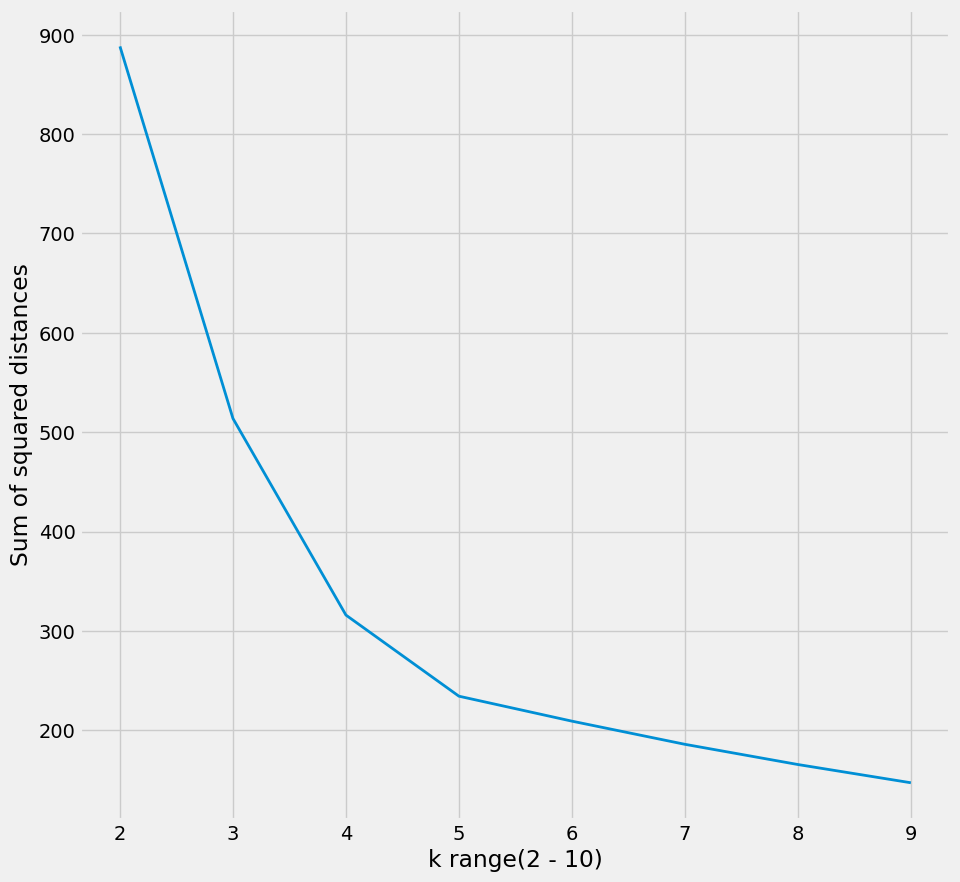

In [236]:
plt.figure(figsize=(10, 10))
plt.plot(k_values, inertias)
plt.xlabel("k range(2 - 10)")
plt.ylabel("Sum of squared distances")
plt.show()

In [237]:
# Based on this, 4 or 5 should be the optimal value of k. I'm going to pick 5 since after it, the plot doesn't change that much anymore.

In [238]:
df_cluster = df_freq.copy()

In [239]:
kmeans = KMeans(n_clusters=5, n_init=20, random_state=0)
subset = df_cluster[cluster_columns]
df_cluster["cluster"] = kmeans.fit_predict(subset)

In [240]:
df_cluster

acce_x    acce_y    acce_z     gyro_x     gyro_y  \
epoch (ms)                                                                    
2019-01-11 15:08:08.000 -0.172350  0.909033 -0.168556 -27.895242 -10.831760   
2019-01-11 15:08:08.400 -0.024777  0.860474 -0.059254  -2.040040  -1.316930   
2019-01-11 15:08:08.800 -0.063378  0.997048 -0.033869   1.164754  -1.844231   
2019-01-11 15:08:09.200 -0.044993  0.971809 -0.038011   2.469483  -3.482648   
2019-01-11 15:08:09.600 -0.046925  0.911220 -0.056463   8.471911   4.745072   
...                           ...       ...       ...        ...        ...   
2019-01-20 17:33:26.200  0.063910 -0.952114  0.107673 -38.792016   8.810964   
2019-01-20 17:33:26.600 -0.024266 -1.193314 -0.109309  -2.783290  -1.783932   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545   2.032956  -4.019557   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951  -0.043109  -2.022091   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316   1.105070  -4.020475   

                            gyro_z participant  label category  set  ...  \
epoch (ms)                                                           ...   
2019-01-11 15:08:08.000  26.285743           B  bench    heavy   30  ...   
2019-01-11 15:08:08.400   1.986210           B  bench    heavy   30  ...   
2019-01-11 15:08:08.800  -1.240332           B  bench    heavy   30  ...   
2019-01-11 15:08:09.200   3.563210           B  bench    heavy   30  ...   
2019-01-11 15:08:09.600  -8.708681           B  bench    heavy   30  ...   
...                            ...         ...    ...      ...  ...  ...   
2019-01-20 17:33:26.200  14.997831           E    row   medium   90  ...   
2019-01-20 17:33:26.600   6.232364           E    row   medium   90  ...   
2019-01-20 17:33:27.000   0.196986           E    row   medium   90  ...   
2019-01-20 17:33:27.400   1.155930           E    row   medium   90  ...   
2019-01-20 17:33:27.800   0.974497           E    row   medium   90  ...   

                         gyro_r_pse  gyro_r_freq_0.0_Hz_ws_14  \
epoch (ms)                                                      
2019-01-11 15:08:08.000    0.404506                241.915837   
2019-01-11 15:08:08.400    0.376805                266.641927   
2019-01-11 15:08:08.800    0.508919                262.078311   
2019-01-11 15:08:09.200    0.492961                256.245567   
2019-01-11 15:08:09.600    0.363189                214.663711   
...                             ...                       ...   
2019-01-20 17:33:26.200    0.350704                368.429928   
2019-01-20 17:33:26.600    0.324461                379.719977   
2019-01-20 17:33:27.000    0.238607                319.521621   
2019-01-20 17:33:27.400    0.577277                267.731227   
2019-01-20 17:33:27.800    0.333870                235.498209   

                         gyro_r_freq_0.357_Hz_ws_14  \
epoch (ms)                                            
2019-01-11 15:08:08.000                  -32.414519   
2019-01-11 15:08:08.400                  -45.027971   
2019-01-11 15:08:08.800                  -56.234625   
2019-01-11 15:08:09.200                  -31.989318   
2019-01-11 15:08:09.600                  -12.227055   
...                                             ...   
2019-01-20 17:33:26.200                   29.216316   
2019-01-20 17:33:26.600                   39.879652   
2019-01-20 17:33:27.000                  -34.907878   
2019-01-20 17:33:27.400                  -73.117861   
2019-01-20 17:33:27.800                  -37.570166   

                         gyro_r_freq_0.714_Hz_ws_14  \
epoch (ms)                                            
2019-01-11 15:08:08.000                   17.800054   
2019-01-11 15:08:08.400                  -65.743054   
2019-01-11 15:08:08.800                  -30.091473   
2019-01-11 15:08:09.200                   69.348370   
2019-01-11 15:08:09.600                   13.687545   
...                                             ...   
2019-01-

In [241]:
# Now we can see that the cluster column has been added with the resulted value of K=5

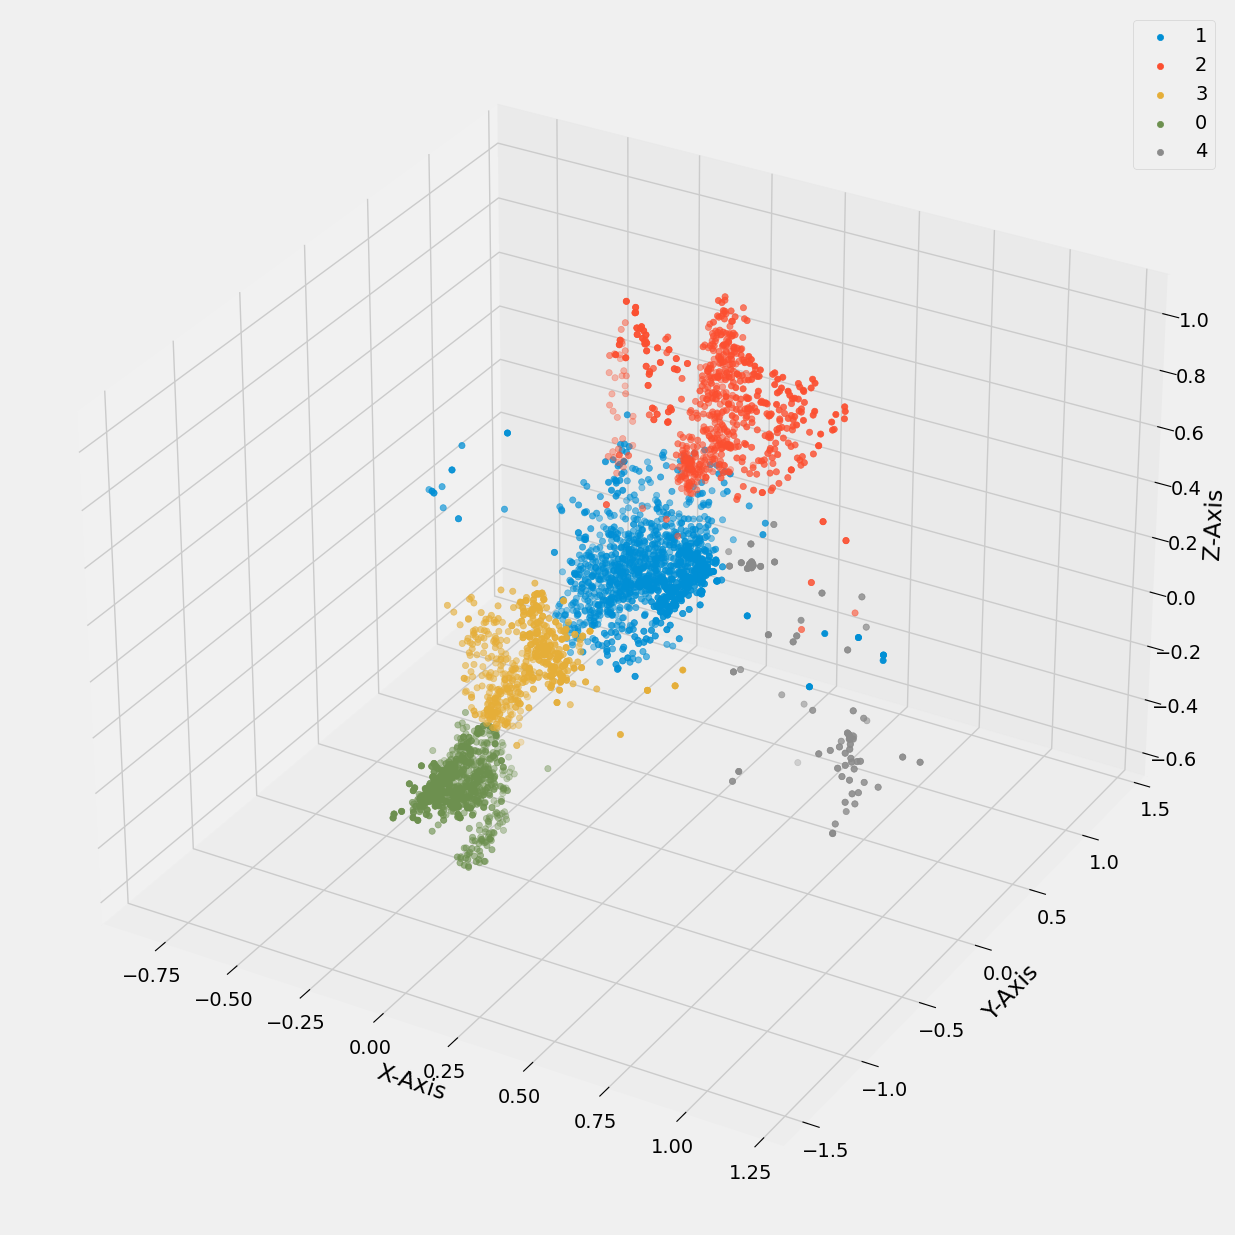

In [242]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection="3d")
for per_cluster_value in df_cluster["cluster"].unique():
    subset = df_cluster[df_cluster["cluster"] == per_cluster_value]
    ax.scatter(subset["acce_x"], subset["acce_y"], subset["acce_z"], label=per_cluster_value)
ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
plt.legend()
plt.show()

In [243]:
df_cluster["label"].unique()

array(['bench', 'ohp', 'squat', 'dead', 'row', 'rest'], dtype=object)

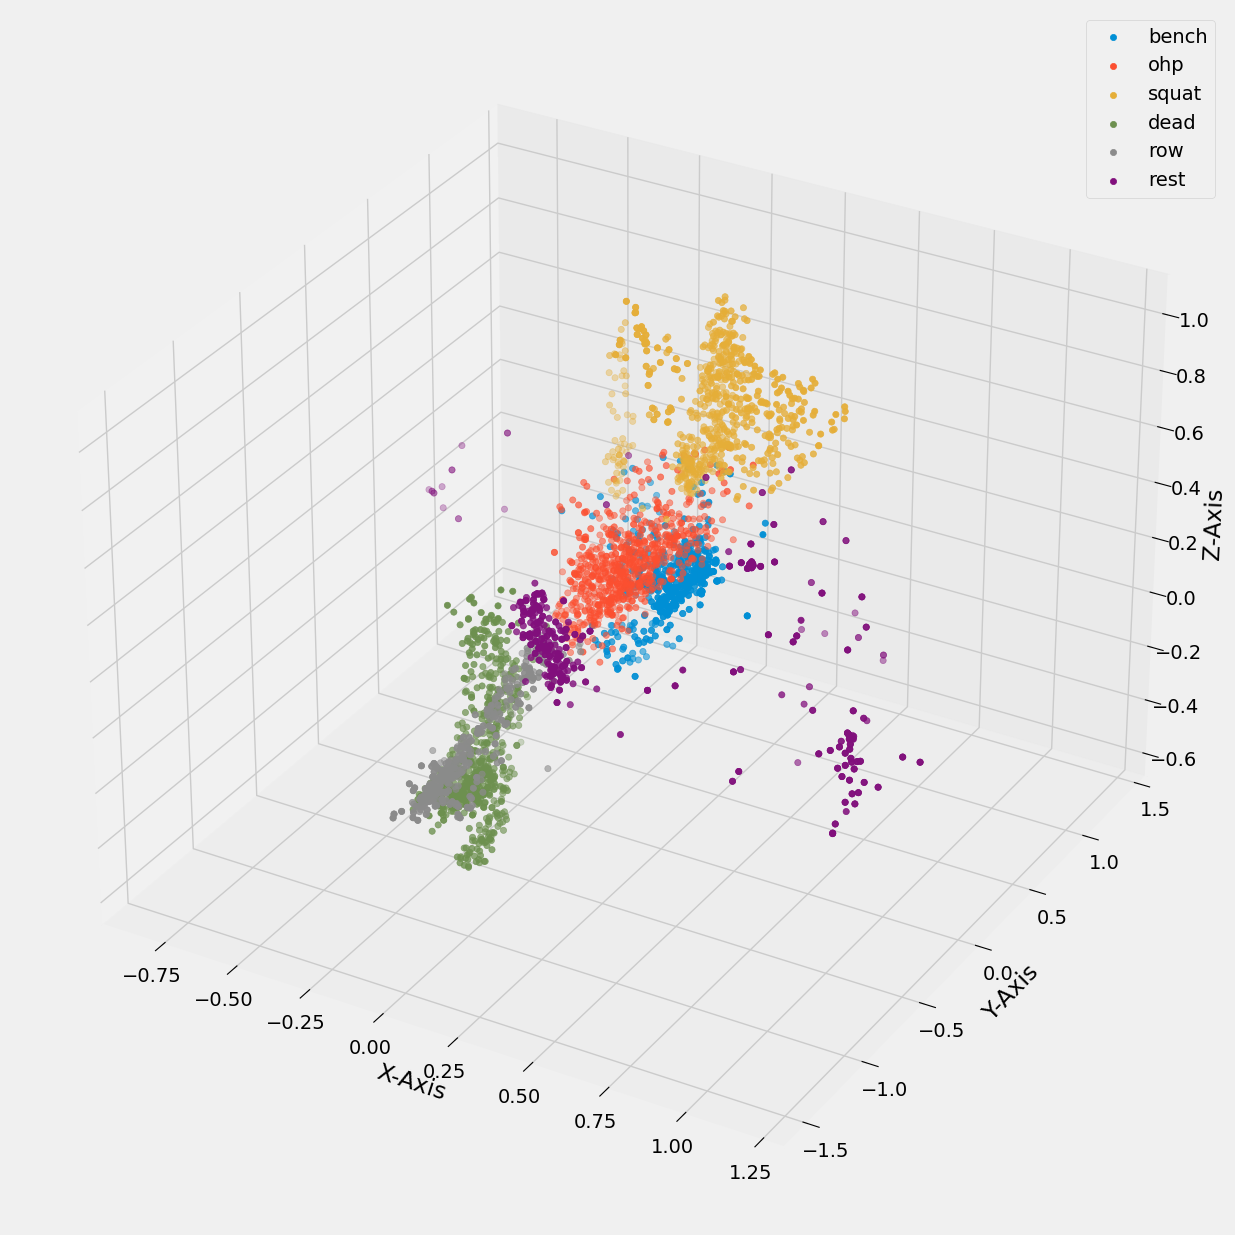

In [244]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection="3d")
for per_label in df_cluster["label"].unique():
    subset = df_cluster[df_cluster["label"] == per_label]
    ax.scatter(subset["acce_x"], subset["acce_y"], subset["acce_z"], label=per_label)
ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
plt.legend()
plt.show()

In [246]:
# With this, we can interpret the data more clearly. Bench and Overhead Press (ohp) are almost in the same place since the mechanics of it is almost the same. Same goes for the Dead and Row. As for Squat, you can clearly see the movements that it requires and is seperated to the other exercise. Finally, the rest, it's all over the place since... the participants are resting. They are doing anything they want.

In [247]:
# What the clustering that we got from KMean does, it is a unsupervised learning. And we can see if we compare the two graphs that, the cluster captures the exercises and rest with its respect values.
# K = 0, captures tje row and dead mostly.
# K = 1, captures the ohp and bench mostly.. and some of the rest.
# K = 2, captures the squat mostly.
# K = 3, captures the rest, some of the row, dead, and ohp, and maybe a little bit of bench.
# K = 4, captures the rest mostly.

In [249]:
# Finally, exporting the data.

In [250]:
df_cluster.to_pickle("../../data/interim/03_data_features.pkl")

In [251]:
df_cluster

acce_x    acce_y    acce_z     gyro_x     gyro_y  \
epoch (ms)                                                                    
2019-01-11 15:08:08.000 -0.172350  0.909033 -0.168556 -27.895242 -10.831760   
2019-01-11 15:08:08.400 -0.024777  0.860474 -0.059254  -2.040040  -1.316930   
2019-01-11 15:08:08.800 -0.063378  0.997048 -0.033869   1.164754  -1.844231   
2019-01-11 15:08:09.200 -0.044993  0.971809 -0.038011   2.469483  -3.482648   
2019-01-11 15:08:09.600 -0.046925  0.911220 -0.056463   8.471911   4.745072   
...                           ...       ...       ...        ...        ...   
2019-01-20 17:33:26.200  0.063910 -0.952114  0.107673 -38.792016   8.810964   
2019-01-20 17:33:26.600 -0.024266 -1.193314 -0.109309  -2.783290  -1.783932   
2019-01-20 17:33:27.000 -0.043276 -0.988153 -0.062545   2.032956  -4.019557   
2019-01-20 17:33:27.400 -0.048048 -1.044737 -0.065951  -0.043109  -2.022091   
2019-01-20 17:33:27.800 -0.044005 -1.035004 -0.059316   1.105070  -4.020475   

                            gyro_z participant  label category  set  ...  \
epoch (ms)                                                           ...   
2019-01-11 15:08:08.000  26.285743           B  bench    heavy   30  ...   
2019-01-11 15:08:08.400   1.986210           B  bench    heavy   30  ...   
2019-01-11 15:08:08.800  -1.240332           B  bench    heavy   30  ...   
2019-01-11 15:08:09.200   3.563210           B  bench    heavy   30  ...   
2019-01-11 15:08:09.600  -8.708681           B  bench    heavy   30  ...   
...                            ...         ...    ...      ...  ...  ...   
2019-01-20 17:33:26.200  14.997831           E    row   medium   90  ...   
2019-01-20 17:33:26.600   6.232364           E    row   medium   90  ...   
2019-01-20 17:33:27.000   0.196986           E    row   medium   90  ...   
2019-01-20 17:33:27.400   1.155930           E    row   medium   90  ...   
2019-01-20 17:33:27.800   0.974497           E    row   medium   90  ...   

                         gyro_r_pse  gyro_r_freq_0.0_Hz_ws_14  \
epoch (ms)                                                      
2019-01-11 15:08:08.000    0.404506                241.915837   
2019-01-11 15:08:08.400    0.376805                266.641927   
2019-01-11 15:08:08.800    0.508919                262.078311   
2019-01-11 15:08:09.200    0.492961                256.245567   
2019-01-11 15:08:09.600    0.363189                214.663711   
...                             ...                       ...   
2019-01-20 17:33:26.200    0.350704                368.429928   
2019-01-20 17:33:26.600    0.324461                379.719977   
2019-01-20 17:33:27.000    0.238607                319.521621   
2019-01-20 17:33:27.400    0.577277                267.731227   
2019-01-20 17:33:27.800    0.333870                235.498209   

                         gyro_r_freq_0.357_Hz_ws_14  \
epoch (ms)                                            
2019-01-11 15:08:08.000                  -32.414519   
2019-01-11 15:08:08.400                  -45.027971   
2019-01-11 15:08:08.800                  -56.234625   
2019-01-11 15:08:09.200                  -31.989318   
2019-01-11 15:08:09.600                  -12.227055   
...                                             ...   
2019-01-20 17:33:26.200                   29.216316   
2019-01-20 17:33:26.600                   39.879652   
2019-01-20 17:33:27.000                  -34.907878   
2019-01-20 17:33:27.400                  -73.117861   
2019-01-20 17:33:27.800                  -37.570166   

                         gyro_r_freq_0.714_Hz_ws_14  \
epoch (ms)                                            
2019-01-11 15:08:08.000                   17.800054   
2019-01-11 15:08:08.400                  -65.743054   
2019-01-11 15:08:08.800                  -30.091473   
2019-01-11 15:08:09.200                   69.348370   
2019-01-11 15:08:09.600                   13.687545   
...                                             ...   
2019-01-